# Mini Project 4
# Predict Customer Clicked Ads Classification by Using Machine Learning

Amarindra Ardinova
DS#33
Rakamin

In [1]:
#----- default library --------#

#----- importance library -----#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all" # able to run multiple command in 1 line

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)  # display whole numbers without +3
pd.set_option('display.float_format', '{:,.1f}'.format) # thousand separated by comma
pd.options.display.float_format = '{:,}'.format # thousand separated by comma

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = '/Users/amarindraardinova/Documents/Data Scientist/Rakamin/Rakamin/04. VIX/Mini Projects/MinPro 4 - Predict Customer Clicked Ads/Clicked Ads Dataset.csv'

df = pd.read_csv(data).round(2)

#  Tugas 1

## EDA

In [3]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

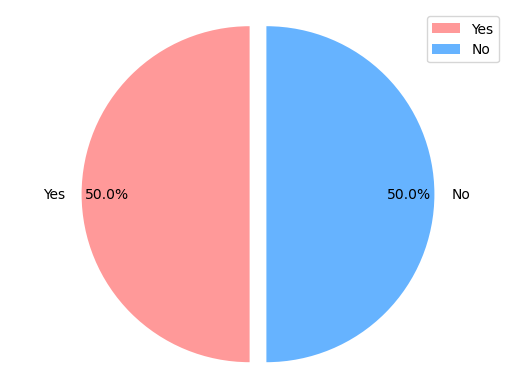

In [4]:
# ads ratio

clicked_counts = df['Clicked on Ad'].value_counts()
ratio_yes = clicked_counts['Yes'] / len(df)   # Menghitung rasio 'Yes' terhadap total

# Menyiapkan data untuk pie plot
labels = ['Yes', 'No']
sizes = [clicked_counts['Yes'], clicked_counts['No']]
colors = ['#ff9999', '#66b3ff']  # Warna untuk 'Yes' dan 'No'
explode = (0.1, 0)  # Untuk memberi efek explode pada slice 'Yes'

# Membuat pie plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Mengatur aspek menjadi 'equal' untuk memastikan plot berbentuk lingkaran
plt.axis('equal')

# Menampilkan legenda
plt.legend(loc='upper right')

# Menampilkan pie plot
plt.show();

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe()

Unnamed: 0  Daily Time Spent on Site              Age  \
count           1,000.0                     987.0          1,000.0   
mean              499.5         64.92952380952381           36.009   
std   288.8194360957494         15.84469946358943 8.78556231012592   
min                 0.0                      32.6             19.0   
25%              249.75        51.269999999999996             29.0   
50%               499.5                     68.11             35.0   
75%              749.25         78.46000000000001             42.0   
max               999.0                     91.43             61.0   

               Area Income  Daily Internet Usage  
count                987.0                 989.0  
mean  384,864,670.63829786    179.86361981799797  
std    94,079,989.56925914    43.870142150541916  
min           97,975,500.0                104.78  
25%          328,632,990.0                138.71  
50%          399,068,320.0                182.65  
75%          458,355,450.0                218.79  
max          556,393,600.0                267.01

In [7]:
df.describe(include=object)

Male        Timestamp Clicked on Ad      city  \
count         997             1000          1000      1000   
unique          2              997             2        30   
top     Perempuan  5/26/2016 15:40            No  Surabaya   
freq          518                2           500        64   

                             province  category  
count                            1000      1000  
unique                             16        10  
top     Daerah Khusus Ibukota Jakarta  Otomotif  
freq                              253       112

## Cleaning Data

In [8]:
df['Unnamed: 0'].head() # Merupakan Indexing yang belum di Delete

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [11]:
# drop Unnamed 0
df.drop('Unnamed: 0', axis=1, inplace=True)

# lowercase
df.columns = df.columns.str.lower()

df.head()

daily time spent on site  age   area income  daily internet usage  \
0                     68.95   35 432,837,300.0                256.09   
1                     80.23   31 479,092,950.0                193.77   
2                     69.47   26 418,501,580.0                 236.5   
3                     74.15   29 383,643,260.0                245.89   
4                     68.37   35 517,229,930.0                225.58   

        male        timestamp clicked on ad           city  \
0  Perempuan   3/27/2016 0:53            No  Jakarta Timur   
1  Laki-Laki    4/4/2016 1:39            No       Denpasar   
2  Perempuan  3/13/2016 20:35            No       Surabaya   
3  Laki-Laki   1/10/2016 2:31            No          Batam   
4  Perempuan    6/3/2016 3:36            No          Medan   

                        province    category  
0  Daerah Khusus Ibukota Jakarta   Furniture  
1                           Bali        Food  
2                     Jawa Timur  Electronic  
3                 Kepulauan Riau       House  
4                  Sumatra Utara     Finance

In [12]:
# Analisis Unique

df.nunique()
df['city'].unique()
df['province'].unique()
df['category'].unique()

daily time spent on site    890
age                          43
area income                 987
daily internet usage        955
male                          2
timestamp                   997
clicked on ad                 2
city                         30
province                     16
category                     10
dtype: int64

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

array(['Furniture', 'Food', 'Electronic', 'House', 'Finance', 'Travel',
       'Health', 'Bank', 'Fashion', 'Otomotif'], dtype=object)

### split type data

In [13]:
nums = df.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns
cats = df.select_dtypes(include=['object']).columns

### Fill Missing Value

In [14]:
# fillna category
df[cats].isna().sum()

male             3
timestamp        0
clicked on ad    0
city             0
province         0
category         0
dtype: int64

In [15]:
df['male'].value_counts()

Perempuan    518
Laki-Laki    479
Name: male, dtype: int64

In [16]:
df['male'].fillna('Perempuan', inplace=True)

In [17]:
#statistik df

df_stat = df.describe().round(2)

median = df[nums].median().to_frame().T
median.rename(index={0:'median'}, inplace=True)


modus = df[nums].mode().iloc[0].to_frame().T
modus.rename(index={0:'modus'}, inplace=True)

df_stat = pd.concat([df_stat, median, modus], axis=0).round(2)

df_stat

daily time spent on site     age    area income  daily internet usage
count                      987.0 1,000.0          987.0                 989.0
mean                       64.93   36.01 384,864,670.64                179.86
std                        15.84    8.79  94,079,989.57                 43.87
min                         32.6    19.0   97,975,500.0                104.78
25%                        51.27    29.0  328,632,990.0                138.71
50%                        68.11    35.0  399,068,320.0                182.65
75%                        78.46    42.0  458,355,450.0                218.79
max                        91.43    61.0  556,393,600.0                267.01
median                     68.11    35.0  399,068,320.0                182.65
modus                      62.26    31.0   97,975,500.0                113.53

In [18]:
# fillna nums
df[nums].isna().sum()

daily time spent on site    13
age                          0
area income                 13
daily internet usage        11
dtype: int64

In [19]:
df['daily time spent on site'].fillna(68.11, inplace=True)
df['area income'].fillna(399068320, inplace=True)
df['daily internet usage'].fillna(182.65, inplace=True)

In [20]:
df[nums].isna().sum()

daily time spent on site    0
age                         0
area income                 0
daily internet usage        0
dtype: int64

In [21]:
df.isna().sum()

daily time spent on site    0
age                         0
area income                 0
daily internet usage        0
male                        0
timestamp                   0
clicked on ad               0
city                        0
province                    0
category                    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area income               1000 non-null   float64
 3   daily internet usage      1000 non-null   float64
 4   male                      1000 non-null   object 
 5   timestamp                 1000 non-null   object 
 6   clicked on ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [23]:
# Change Data Type

In [24]:
# rubah value
df['clicked on ad'] = df['clicked on ad'].replace({'Yes': 1, 'No': 0})
df['male'] = df['male'].replace({'Laki-Laki': 1, 'Perempuan': 0})

In [25]:
df['timestamp'] = df['timestamp'].astype('datetime64')
df['male'] = df['male'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily time spent on site  1000 non-null   float64       
 1   age                       1000 non-null   int64         
 2   area income               1000 non-null   float64       
 3   daily internet usage      1000 non-null   float64       
 4   male                      1000 non-null   int64         
 5   timestamp                 1000 non-null   datetime64[ns]
 6   clicked on ad             1000 non-null   int64         
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


### Summary EDA & Cleaning :
1. 50% clicked on ad, 50% tidak click ad
2. 1000 rows, 11 columns
3. 'Unnamed: 0' kolom di drop
4. Missing Value = Daily Time Spent on Site (13), Area Income (13), Daily Internet Usage (11), Male (3), diisi dengan Median (nilai tengah) untuk mengimbagi skewness, dan Male diisi dengan Perempuan sebagai modus.

## Analysis

### Split Data Type &  Target

In [26]:
nums = df.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns
cats = df.select_dtypes(include=['object']).columns

ad0 = df[df['clicked on ad'] == 0].drop('clicked on ad', axis=1)
ad1 = df[df['clicked on ad'] == 1].drop('clicked on ad', axis=1)

In [27]:
ad0.head()
ad1.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp           city                       province  \
0 2016-03-27 00:53:00  Jakarta Timur  Daerah Khusus Ibukota Jakarta   
1 2016-04-04 01:39:00       Denpasar                           Bali   
2 2016-03-13 20:35:00       Surabaya                     Jawa Timur   
3 2016-01-10 02:31:00          Batam                 Kepulauan Riau   
4 2016-06-03 03:36:00          Medan                  Sumatra Utara   

     category  
0   Furniture  
1        Food  
2  Electronic  
3       House  
4     Finance

daily time spent on site  age   area income  daily internet usage  male  \
7                       66.0   48 172,153,310.0                131.76     1   
10                     47.64   49 319,427,570.0                122.02     0   
12                     69.57   48 361,458,440.0                113.12     1   
14                     42.95   33 216,832,000.0                143.56     0   
15                     63.45   23 365,275,610.0                140.64     1   

             timestamp            city       province category  
7  2016-03-07 01:40:00  Bandar Lampung        Lampung   Health  
10 2016-03-16 20:19:00           Depok     Jawa Barat     Food  
12 2016-06-03 01:14:00          Serang         Banten   Travel  
14 2016-03-24 09:31:00          Padang  Sumatra Barat     Food  
15 2016-03-09 03:41:00          Padang  Sumatra Barat    House

### Univariate Analysis

#### Numericals

<Axes: xlabel='daily time spent on site', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for daily time spent on site')

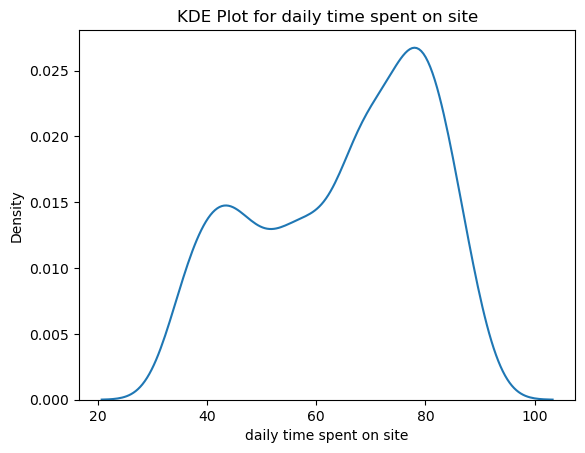

<Axes: xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for age')

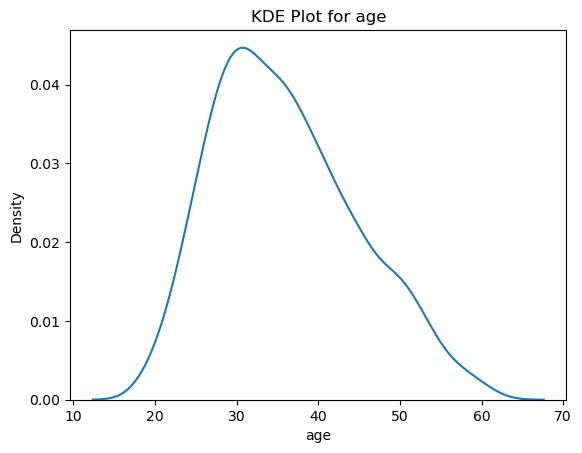

<Axes: xlabel='area income', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for area income')

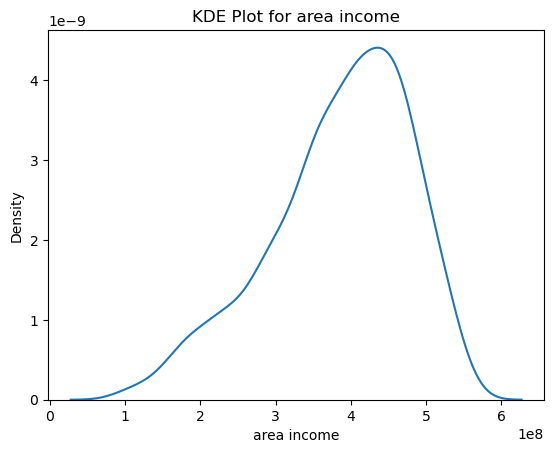

<Axes: xlabel='daily internet usage', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for daily internet usage')

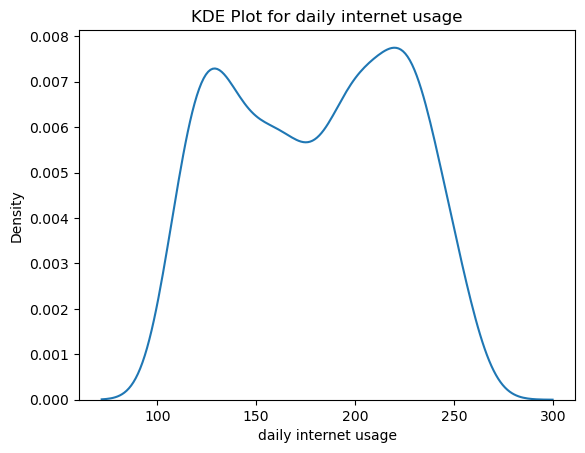

<Axes: xlabel='male', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for male')

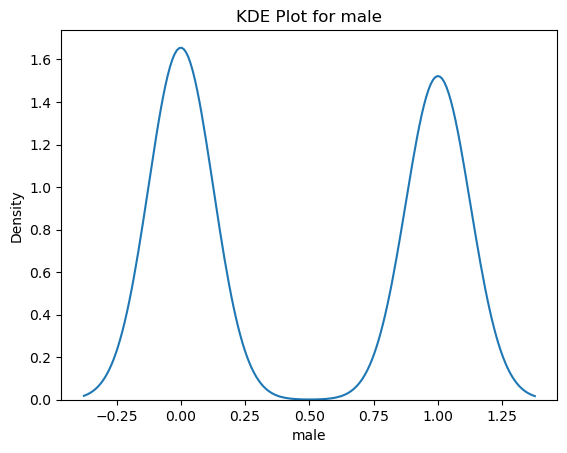

<Axes: xlabel='timestamp', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for timestamp')

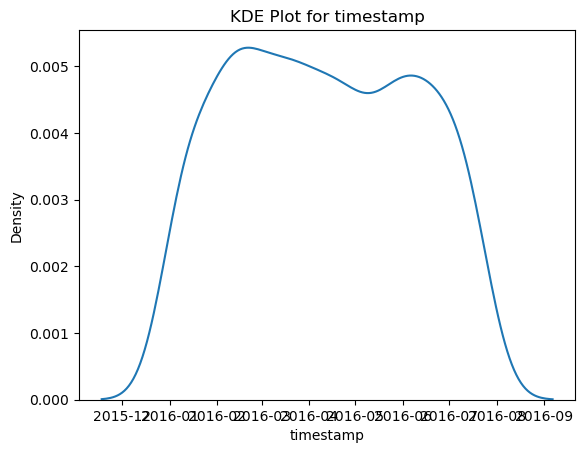

<Axes: xlabel='clicked on ad', ylabel='Density'>

Text(0.5, 1.0, 'KDE Plot for clicked on ad')

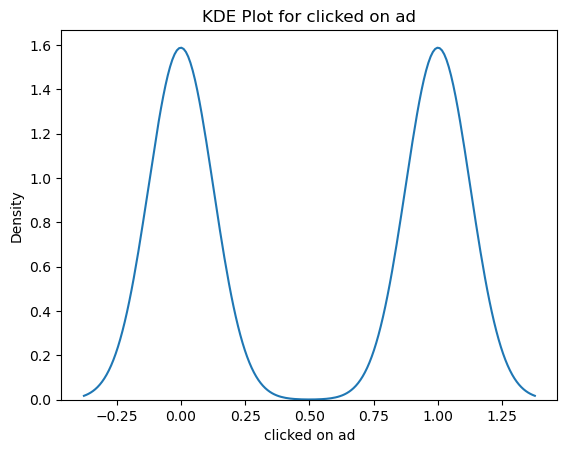

In [28]:
# skewness

for col in nums:
    sns.kdeplot(data=df, x=col)
    plt.title(f'KDE Plot for {col}')
    plt.show();

In [29]:
numsd = nums.drop('timestamp')
numsd

Index(['daily time spent on site', 'age', 'area income',
       'daily internet usage', 'male', 'clicked on ad'],
      dtype='object')

<Axes: xlabel='daily time spent on site'>

Text(0.5, 1.0, 'KDE Plot for daily time spent on site')

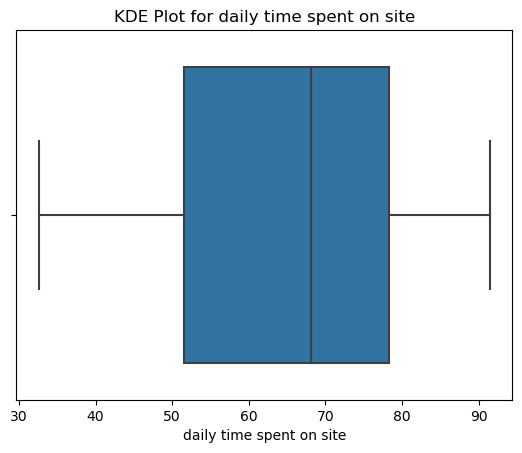

<Axes: xlabel='age'>

Text(0.5, 1.0, 'KDE Plot for age')

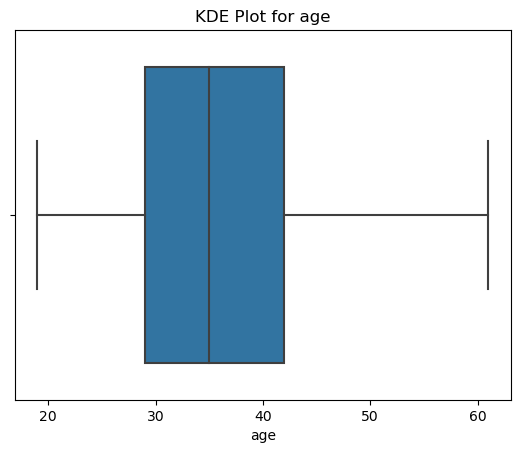

<Axes: xlabel='area income'>

Text(0.5, 1.0, 'KDE Plot for area income')

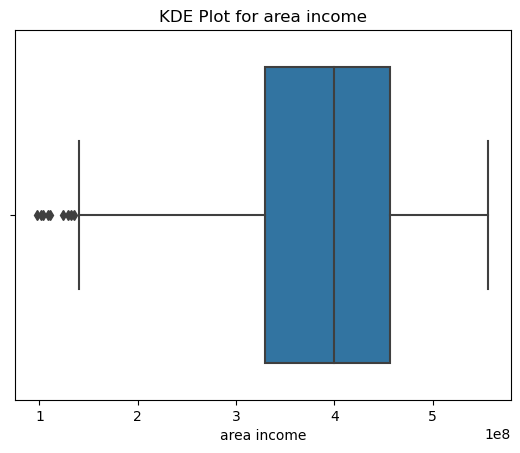

<Axes: xlabel='daily internet usage'>

Text(0.5, 1.0, 'KDE Plot for daily internet usage')

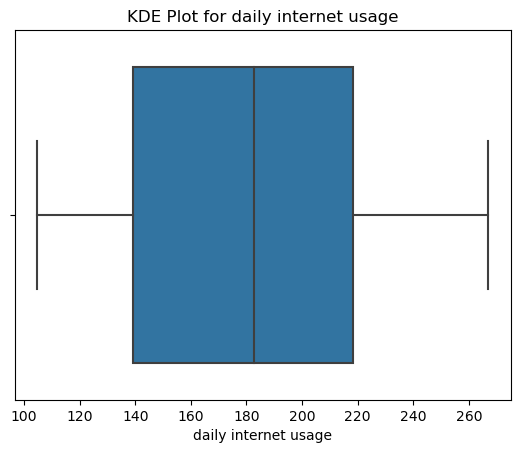

<Axes: xlabel='male'>

Text(0.5, 1.0, 'KDE Plot for male')

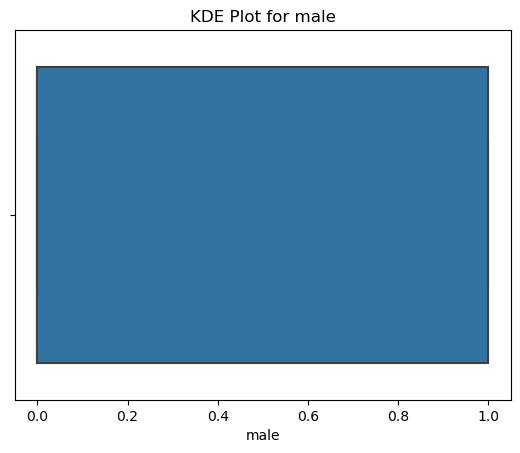

<Axes: xlabel='clicked on ad'>

Text(0.5, 1.0, 'KDE Plot for clicked on ad')

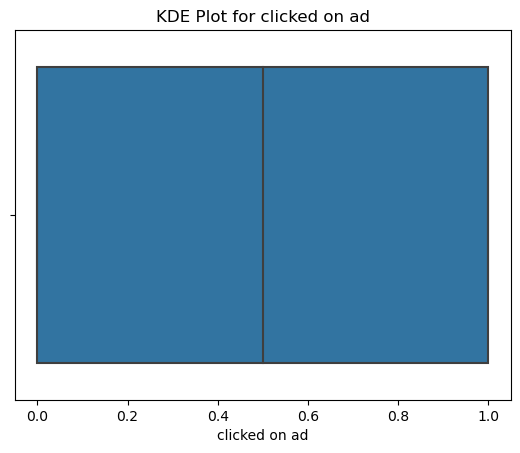

In [30]:
for col in numsd:
    sns.boxplot(data=df, x=col)
    plt.title(f'KDE Plot for {col}')
    plt.show();

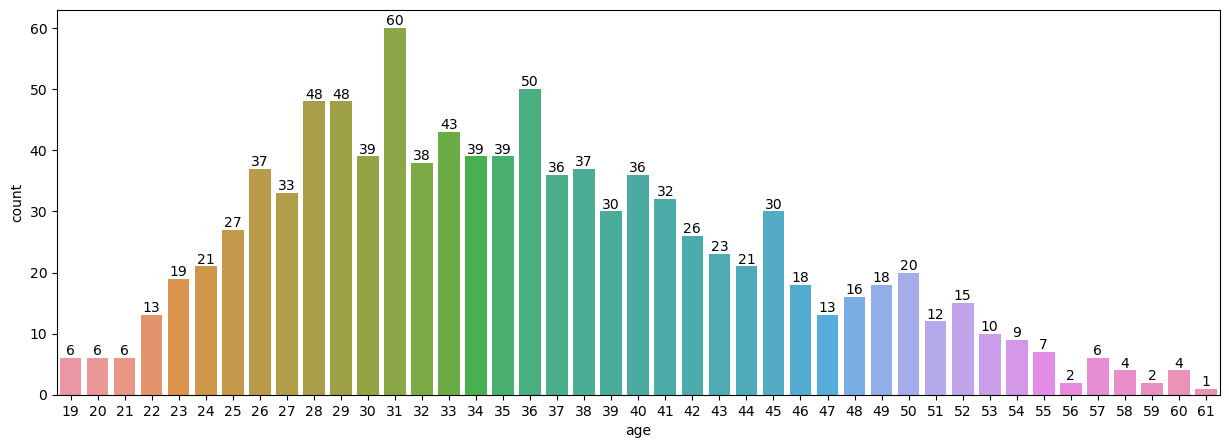

In [31]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='age', data = df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

In [32]:
cats

Index(['city', 'province', 'category'], dtype='object')

#### Categoricals

In [33]:
df.columns

Index(['daily time spent on site', 'age', 'area income',
       'daily internet usage', 'male', 'timestamp', 'clicked on ad', 'city',
       'province', 'category'],
      dtype='object')

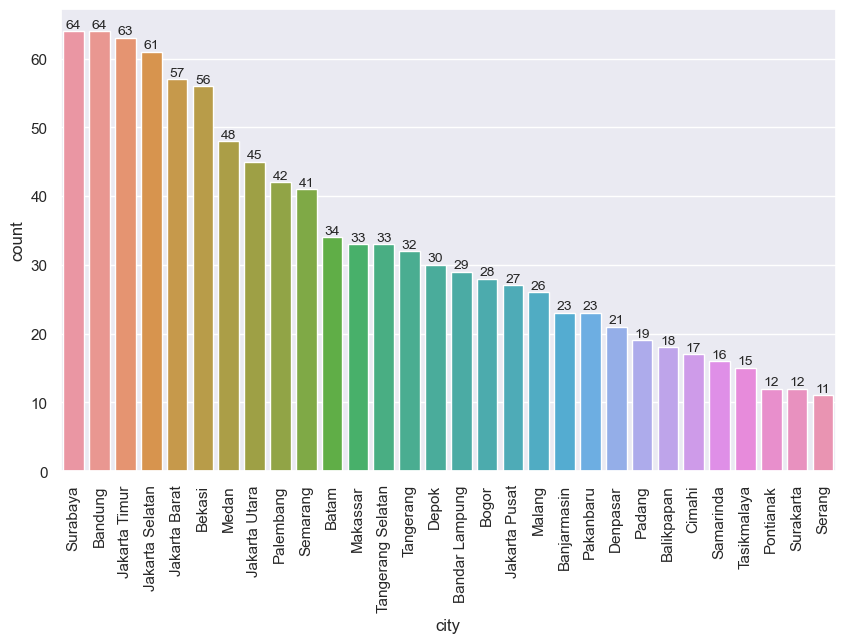

In [34]:
city_counts = df['city'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='city', order=city_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

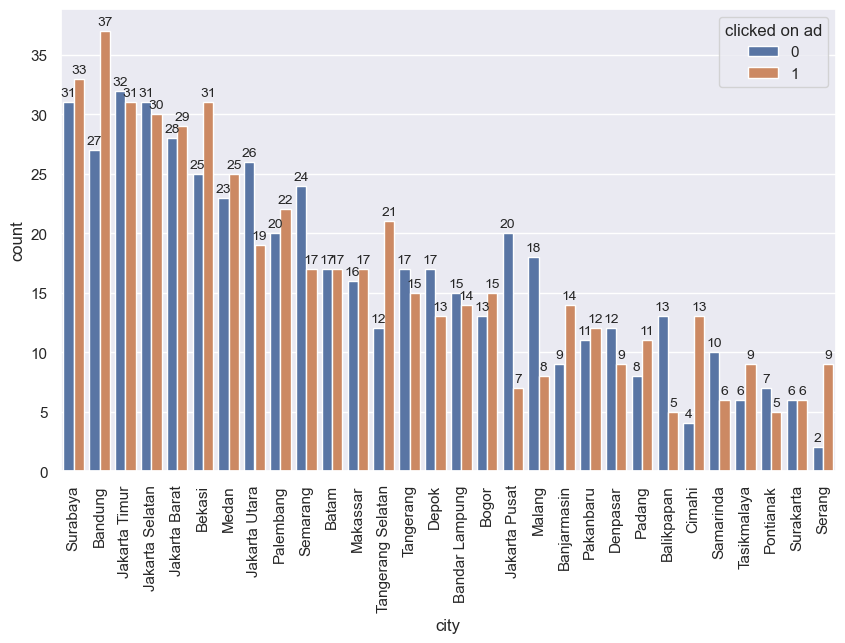

In [35]:
city_counts = df['city'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='city', hue='clicked on ad', order=city_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

In [36]:
df.loc[df['province'] == 'Daerah Khusus Ibukota Jakarta', 'city'].unique()
df[df['city'] == 'Jakarta Timur'].shape[0]
df[df['city'] == 'Jakarta Barat'].shape[0]
df[df['city'] == 'Jakarta Pusat'].shape[0]
df[df['city'] == 'Jakarta Utara'].shape[0]
df[df['city'] == 'Jakarta Selatan'].shape[0]

array(['Jakarta Timur', 'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Utara',
       'Jakarta Selatan'], dtype=object)

63

57

27

45

61

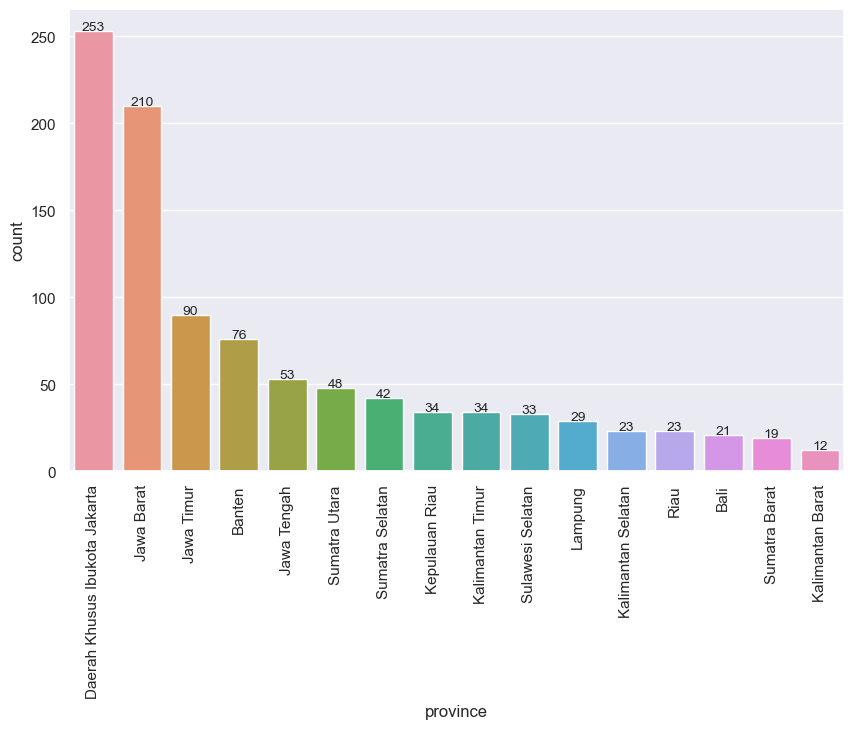

In [37]:
prov_counts = df['province'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='province', order=prov_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

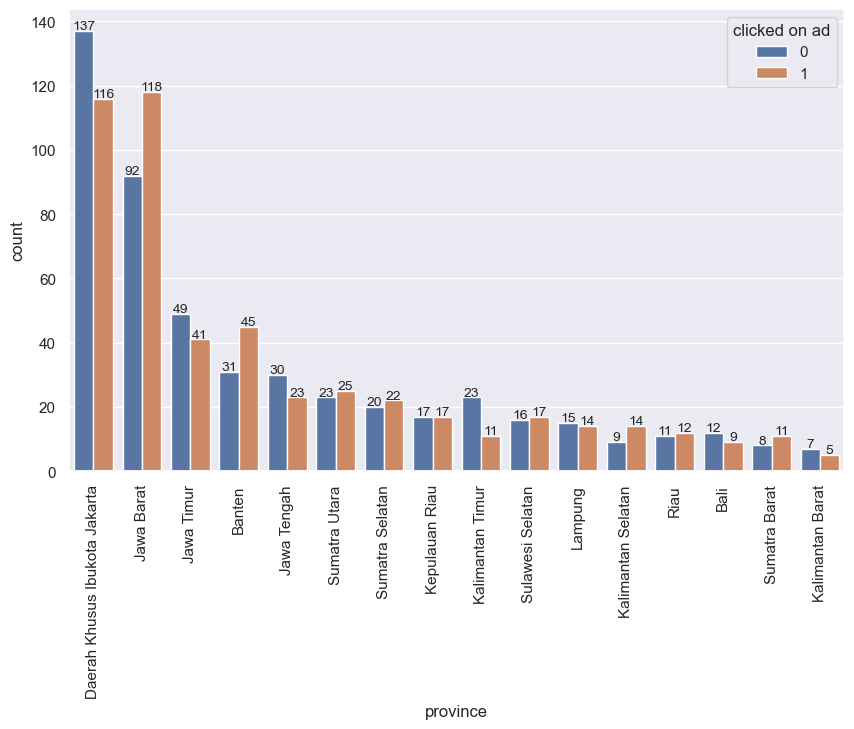

In [38]:
prov_counts = df['province'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='province', hue='clicked on ad',order=prov_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

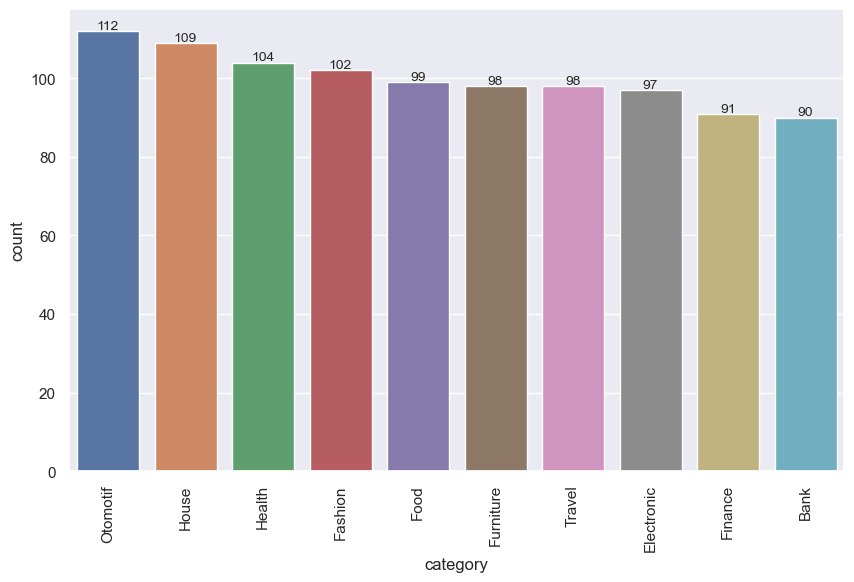

In [39]:
cats_counts = df['category'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='category', order=cats_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

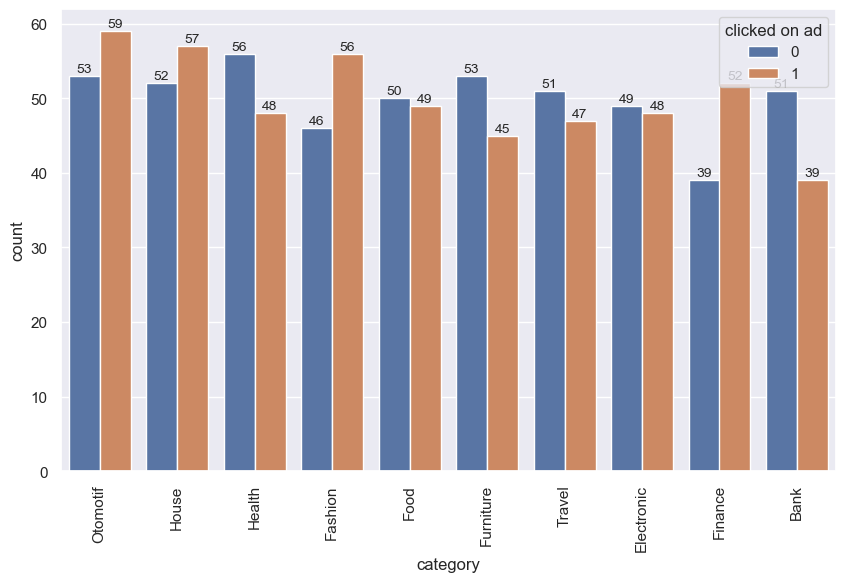

In [40]:
cats_counts = df['category'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=df, x='category', hue='clicked on ad', order=cats_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

### Multivariate Analysis

#### Numericals

In [41]:
pair = df[['daily time spent on site', 'age', 'area income',
       'daily internet usage','clicked on ad']]

In [42]:
pair.shape[0]

nums

1000

Index(['daily time spent on site', 'age', 'area income',
       'daily internet usage', 'male', 'timestamp', 'clicked on ad'],
      dtype='object')

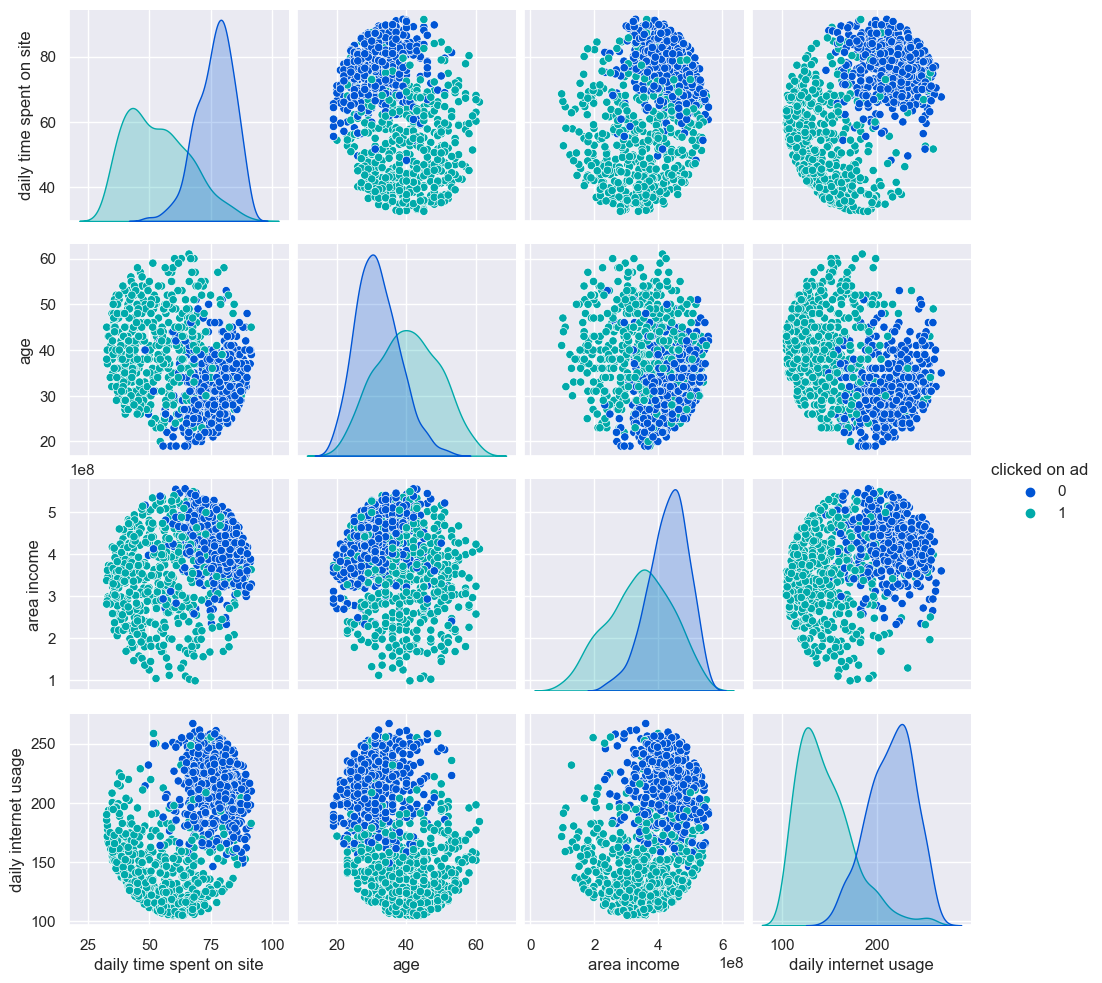

In [43]:
sns.pairplot(pair, diag_kind='kde', palette='winter', hue='clicked on ad')

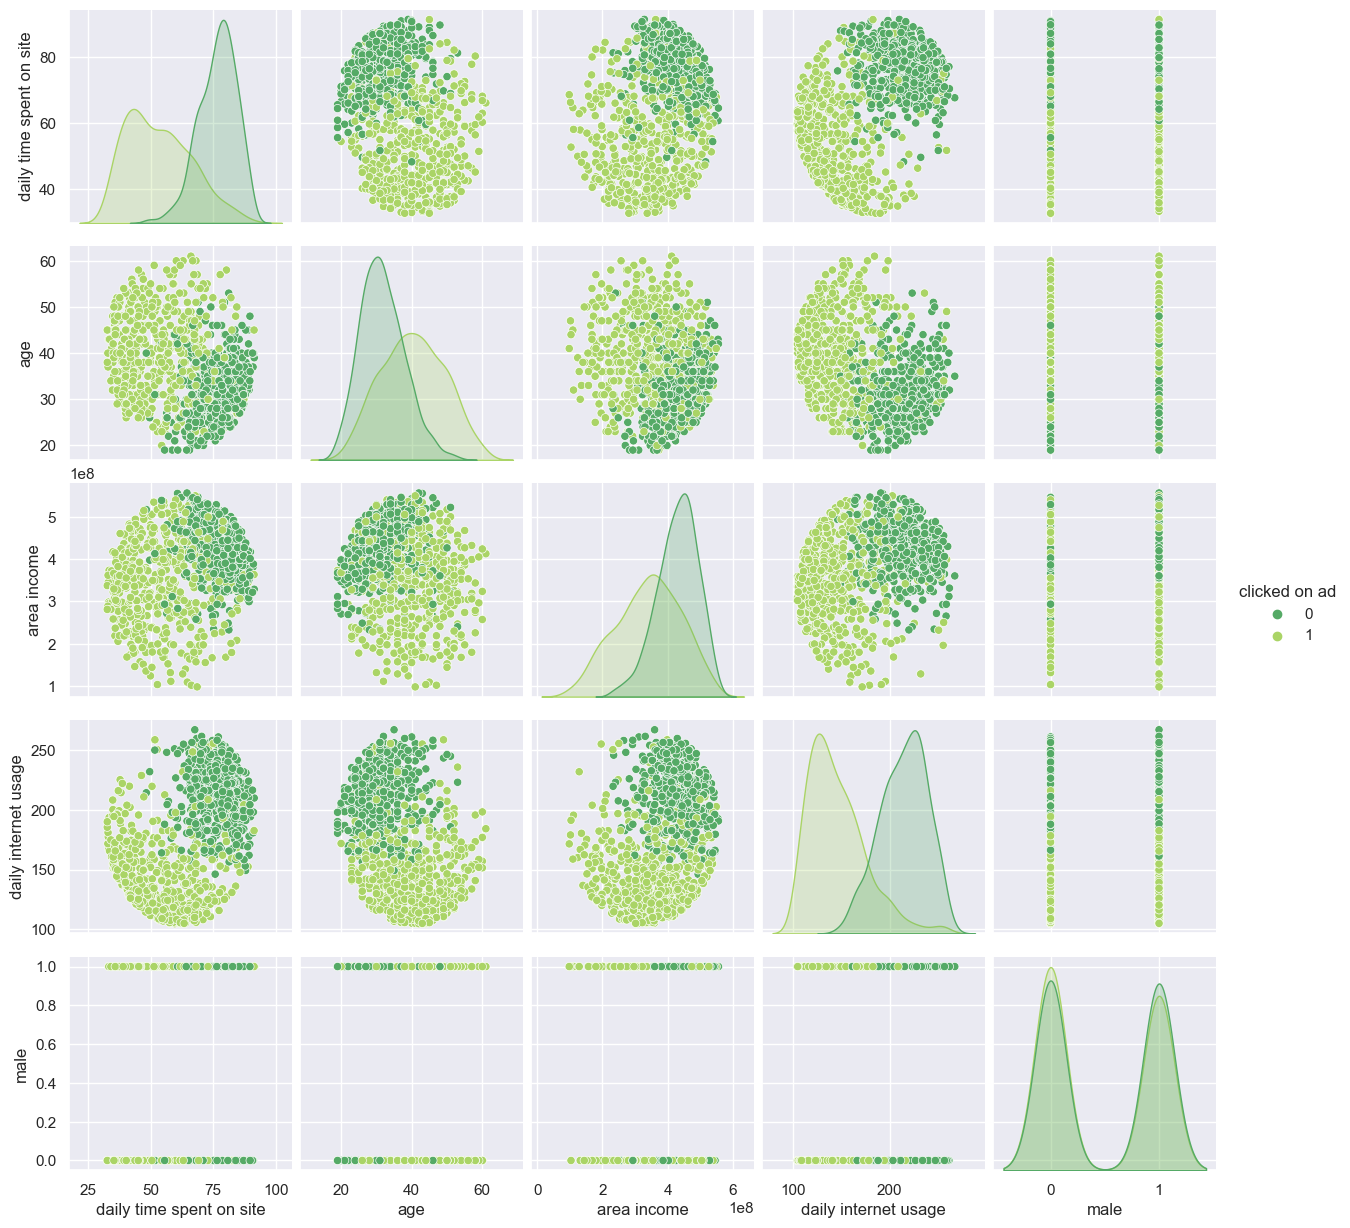

In [44]:
sns.pairplot(df, diag_kind="kde", palette='summer', hue='clicked on ad');

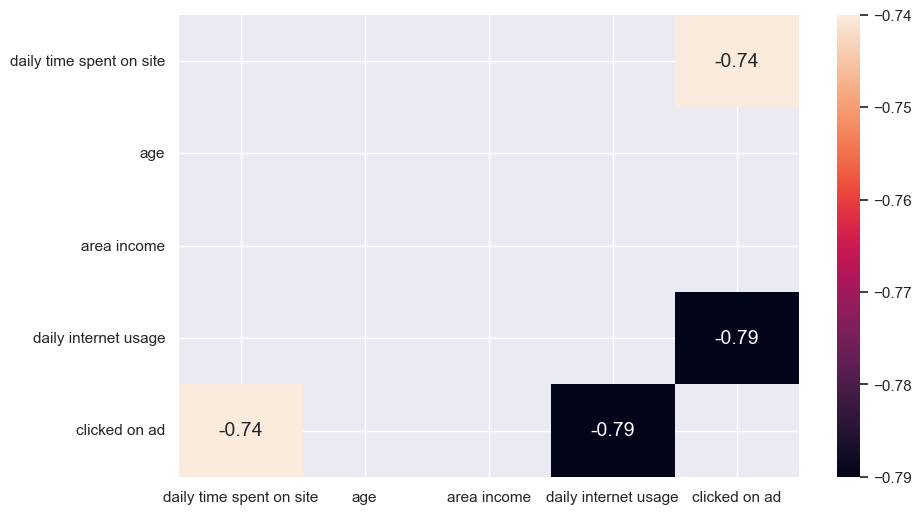

In [45]:
paircorr = pair.corr()
paircorr7= paircorr[paircorr < -0.7].round(2)

annot_kws = {"size": 14}
sns.heatmap(paircorr7, annot=True, cmap='rocket', annot_kws=annot_kws)
plt.show();

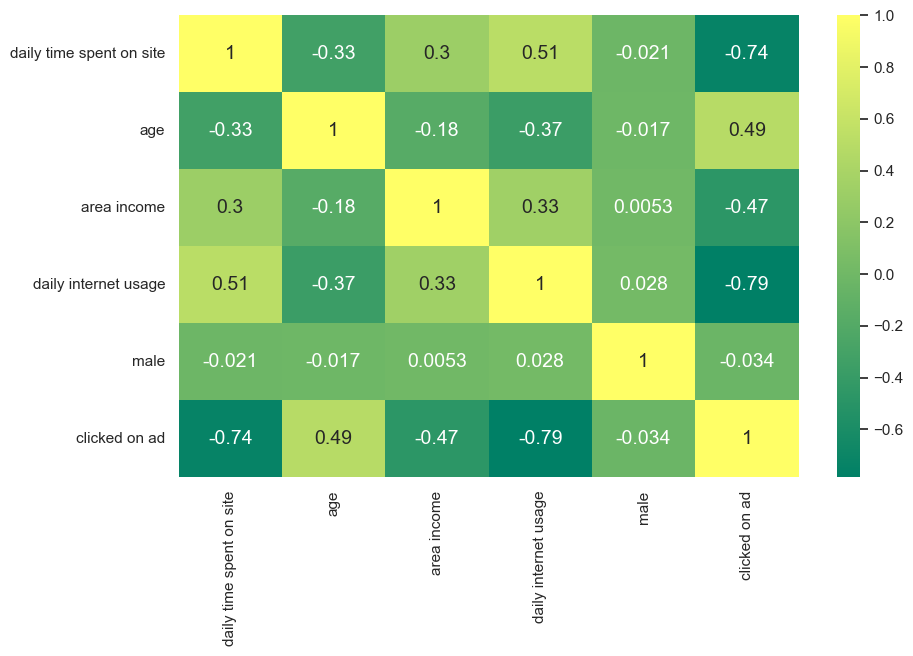

In [46]:
annot_kws = {"size": 14}  # Set the font size to 10
sns.heatmap(df[nums].corr(), annot=True, cmap='summer', annot_kws=annot_kws)

plt.show();

#### Features to Target Analysis


##### Numericals

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='daily time spent on site'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='daily time spent on site'>

<Axes: >

<Axes: xlabel='daily time spent on site', ylabel='Density'>

Text(0.5, 1.0, 'daily time spent on site')

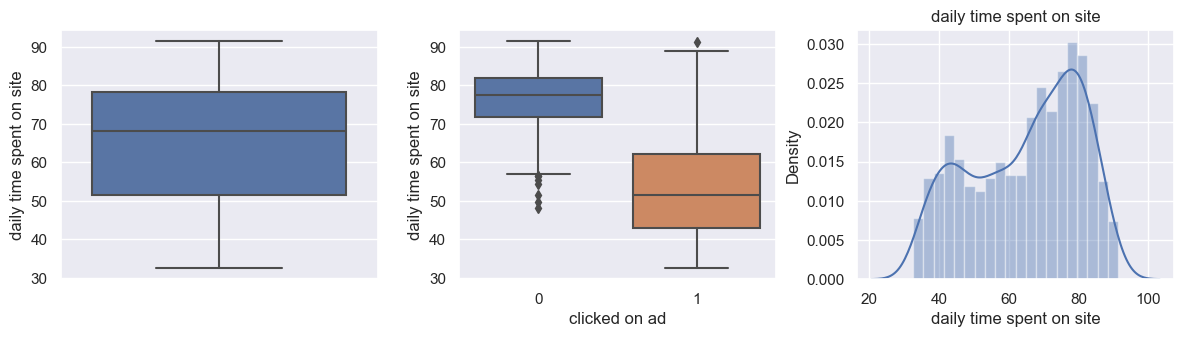

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='age'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='age'>

<Axes: >

<Axes: xlabel='age', ylabel='Density'>

Text(0.5, 1.0, 'age')

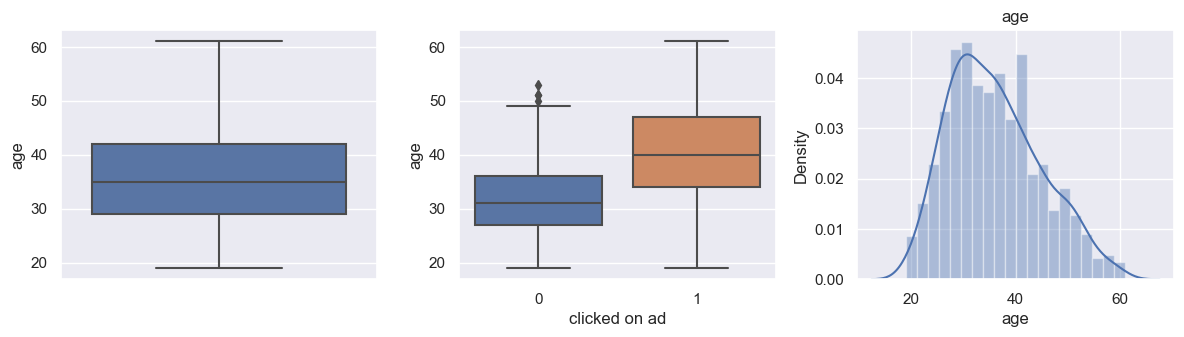

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='area income'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='area income'>

<Axes: >

<Axes: xlabel='area income', ylabel='Density'>

Text(0.5, 1.0, 'area income')

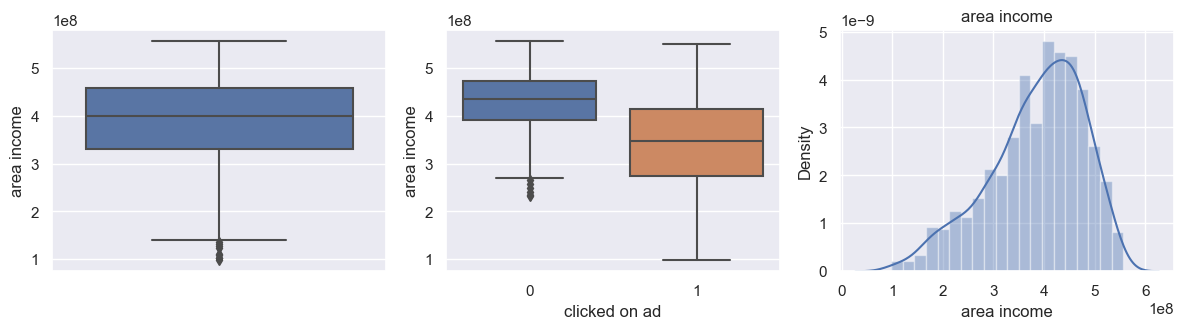

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='daily internet usage'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='daily internet usage'>

<Axes: >

<Axes: xlabel='daily internet usage', ylabel='Density'>

Text(0.5, 1.0, 'daily internet usage')

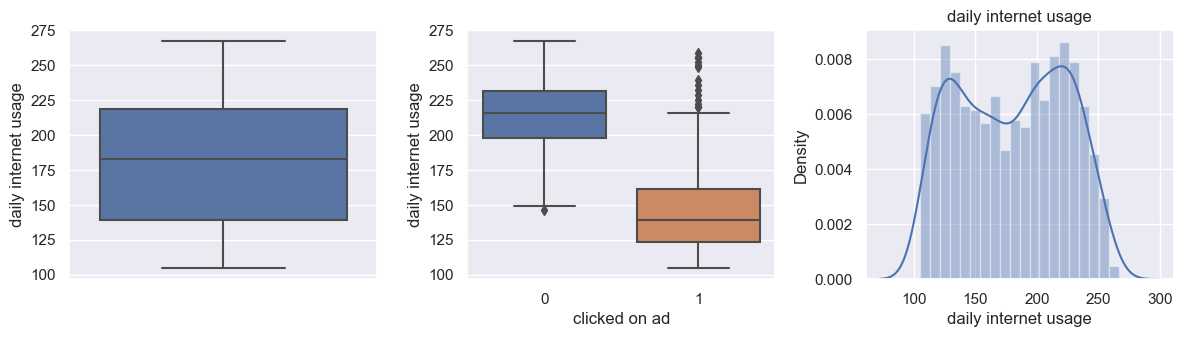

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='male'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='male'>

<Axes: >

<Axes: xlabel='male', ylabel='Density'>

Text(0.5, 1.0, 'male')

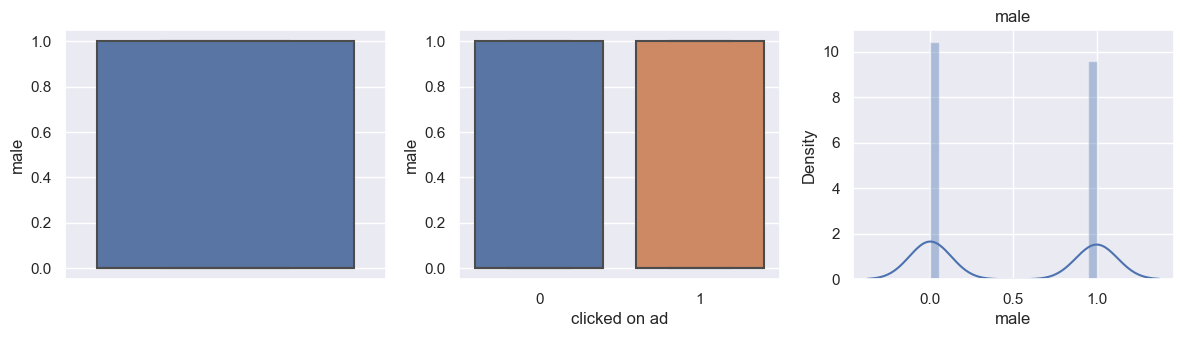

<Figure size 1200x600 with 0 Axes>

<Axes: >

<Axes: ylabel='clicked on ad'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='clicked on ad'>

<Axes: >

<Axes: xlabel='clicked on ad', ylabel='Density'>

Text(0.5, 1.0, 'clicked on ad')

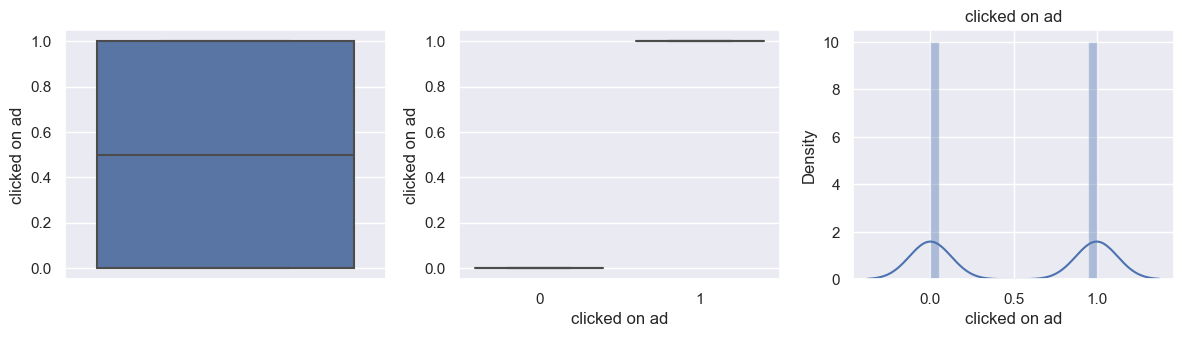

In [47]:
for i in numsd:
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df,y=i)
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df,x = 'clicked on ad',y=i)
    
    plt.subplot(2,3,3)
    sns.distplot(df[i],bins=20)
    plt.tight_layout()
    plt.title(i)
    plt.show();

In [48]:
df.columns

Index(['daily time spent on site', 'age', 'area income',
       'daily internet usage', 'male', 'timestamp', 'clicked on ad', 'city',
       'province', 'category'],
      dtype='object')

##### Categoricals Statistic

In [49]:
# analisis pada city

cad0 = ad0['city'].value_counts().reset_index()
cad0.rename(columns={'city':'counts0','index':'city'}, inplace=True)
cad1 = ad1['city'].value_counts().reset_index()
cad1.rename(columns={'city':'counts1','index':'city'}, inplace=True)

cad = pd.merge(cad0, cad1, on='city', how='inner')
cad['total city']  =  cad['counts0'] + cad['counts1']

cad['total population'] = cad['total city'].sum()

cad['clicked%'] = (100 * cad['counts1'] /  cad['total city']).round(2)
cad['clicked% on total counts'] = (100 * cad['counts1'] /  cad['total population']).round(2)

cad = cad.sort_values(by='clicked%', ascending=False)
cad[cad['clicked%']  > 50].head(10)

city  counts0  counts1  total city  total population  \
29             Serang        2        9          11              1000   
28             Cimahi        4       13          17              1000   
20  Tangerang Selatan       12       21          33              1000   
23        Banjarmasin        9       14          23              1000   
26        Tasikmalaya        6        9          15              1000   
24             Padang        8       11          19              1000   
4             Bandung       27       37          64              1000   
6              Bekasi       25       31          56              1000   
17              Bogor       13       15          28              1000   
9           Palembang       20       22          42              1000   

    clicked%  clicked% on total counts  
29     81.82                       0.9  
28     76.47                       1.3  
20     63.64                       2.1  
23     60.87                       1.4  
26      60.0                       0.9  
24     57.89                       1.1  
4      57.81                       3.7  
6      55.36                       3.1  
17     53.57                       1.5  
9      52.38                       2.2

In [50]:
# analisis pada province

pro0 = ad0['province'].value_counts().reset_index()
pro0.rename(columns={'province':'counts0','index':'province'}, inplace=True)
pro1 = ad1['province'].value_counts().reset_index()
pro1.rename(columns={'province':'counts1','index':'province'}, inplace=True)

pro = pd.merge(pro0, pro1, on='province', how='inner')
pro['total province']  =  pro['counts0'] + pro['counts1']

pro['total population'] = pro['total province'].sum()

pro['clicked%'] = (100 * pro['counts1'] /  pro['total province']).round(2)
pro['clicked% on total counts'] = (100 * pro['counts1'] /  pro['total population']).round(2)

pro = pro.sort_values(by='clicked%', ascending=False)
pro[pro['clicked%']  > 50]

province  counts0  counts1  total province  total population  \
13  Kalimantan Selatan        9       14              23              1000   
3               Banten       31       45              76              1000   
14       Sumatra Barat        8       11              19              1000   
1           Jawa Barat       92      118             210              1000   
7      Sumatra Selatan       20       22              42              1000   
12                Riau       11       12              23              1000   
5        Sumatra Utara       23       25              48              1000   
9     Sulawesi Selatan       16       17              33              1000   

    clicked%  clicked% on total counts  
13     60.87                       1.4  
3      59.21                       4.5  
14     57.89                       1.1  
1      56.19                      11.8  
7      52.38                       2.2  
12     52.17                       1.2  
5      52.08                       2.5  
9      51.52                       1.7

In [51]:
# analisis pada categorical

cat0 = ad0['category'].value_counts().reset_index()
cat0.rename(columns={'category':'counts0','index':'category'}, inplace=True)
cat1 = ad1['category'].value_counts().reset_index()
cat1.rename(columns={'category':'counts1','index':'category'}, inplace=True)

cat = pd.merge(cat0, cat1, on='category', how='inner')
cat['total category']  =  cat['counts0'] + cat['counts1']

cat['total population'] = cat['total category'].sum()

cat['clicked%'] = (100 * cat['counts1'] /  cat['total category']).round(2)
cat['clicked% on total counts'] = (100 * cat['counts1'] /  cat['total population']).round(2)

cat = cat.sort_values(by='clicked%', ascending=False)
cat[cat['clicked%']  > 50]

category  counts0  counts1  total category  total population  clicked%  \
9   Finance       39       52              91              1000     57.14   
8   Fashion       46       56             102              1000      54.9   
2  Otomotif       53       59             112              1000     52.68   
3     House       52       57             109              1000     52.29   

   clicked% on total counts  
9                       5.2  
8                       5.6  
2                       5.9  
3                       5.7

In [52]:
# analisis pada male

mal0 = ad0['male'].value_counts().reset_index()
mal0.rename(columns={'male':'counts0','index':'male'}, inplace=True)
mal1 = ad1['male'].value_counts().reset_index()
mal1.rename(columns={'male':'counts1','index':'male'}, inplace=True)

male = pd.merge(mal0, mal1, on='male', how='inner')
male['total male']  =  male['counts0'] + male['counts1']

male['total population'] = male['total male'].sum()

male['clicked%'] = (100 * male['counts1'] /  male['total male']).round(2)
male['clicked% on total counts'] = (100 * male['counts1'] /  male['total population']).round(2)

male = male.sort_values(by='clicked%', ascending=False)
male[male['clicked%']  > 50]

male  counts0  counts1  total male  total population  clicked%  \
0     0      252      269         521              1000     51.63   

   clicked% on total counts  
0                      26.9

##### numericals vs category

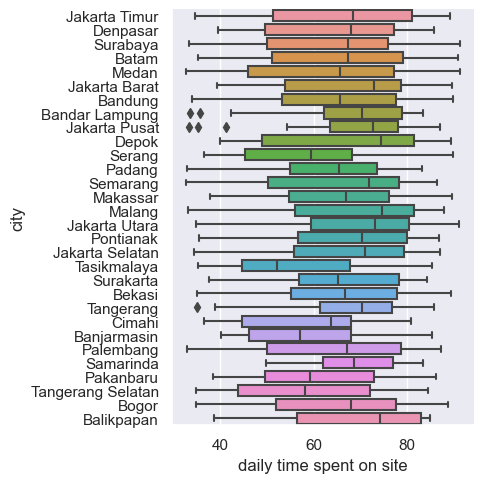

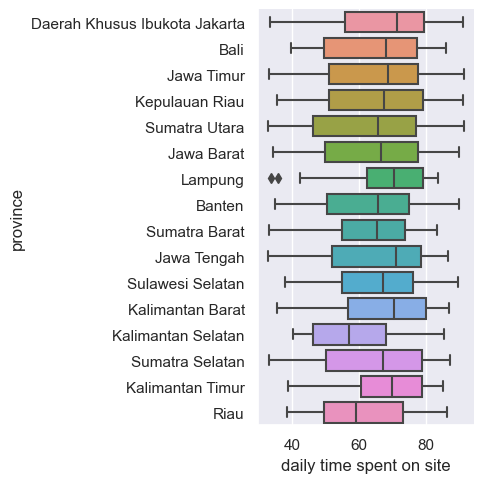

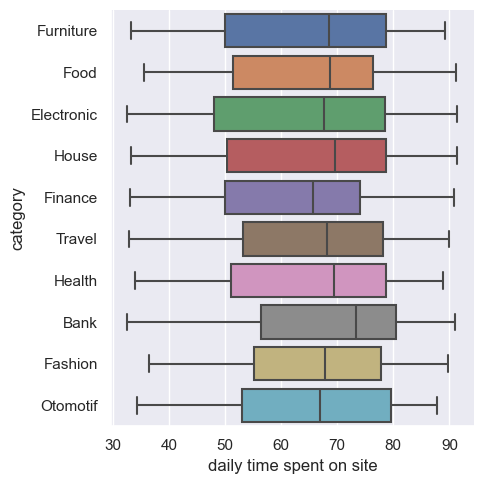

In [53]:
# daily time spent on site
sns.catplot(data=df, x="daily time spent on site", y="city", kind="box");
sns.catplot(data=df, x="daily time spent on site", y="province",kind="box");
sns.catplot(data=df, x="daily time spent on site", y="category",kind="box");

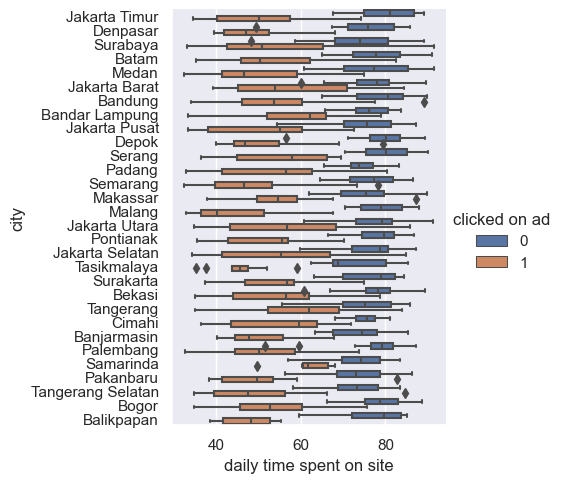

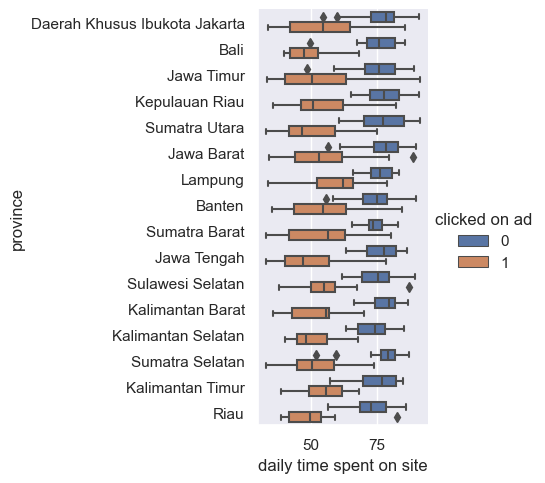

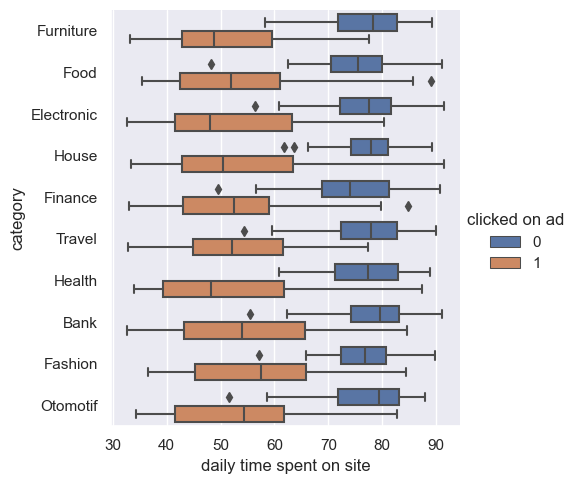

In [54]:
# daily time spent on site
sns.catplot(data=df, x="daily time spent on site", y="city", hue='clicked on ad', kind="box");
sns.catplot(data=df, x="daily time spent on site", y="province", hue='clicked on ad',kind="box");
sns.catplot(data=df, x="daily time spent on site", y="category", hue='clicked on ad',kind="box");

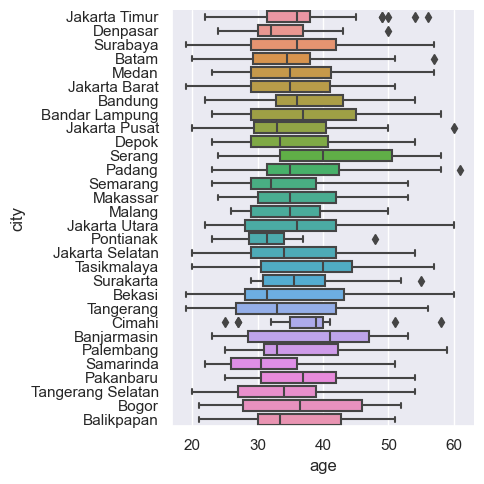

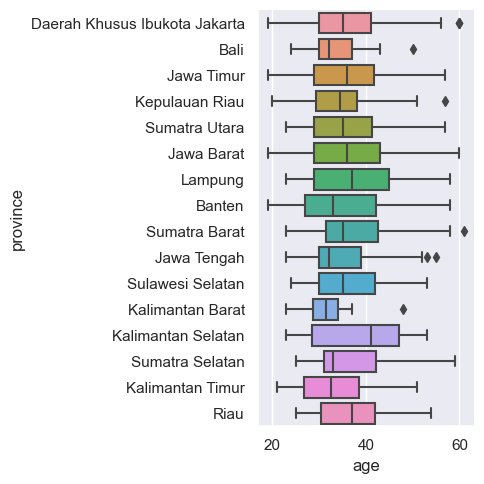

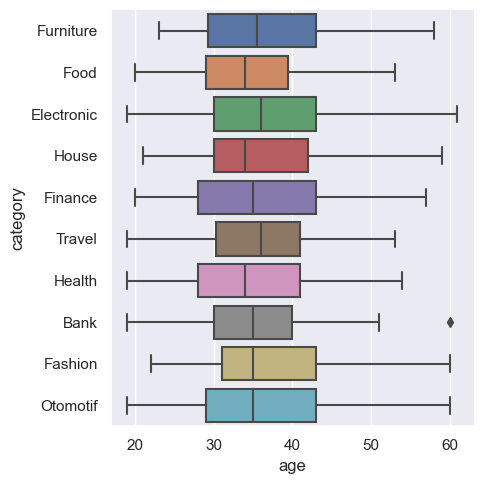

In [55]:
# age
sns.catplot(data=df, x="age", y="city", kind="box");
sns.catplot(data=df, x="age", y="province",kind="box");
sns.catplot(data=df, x="age", y="category",kind="box");

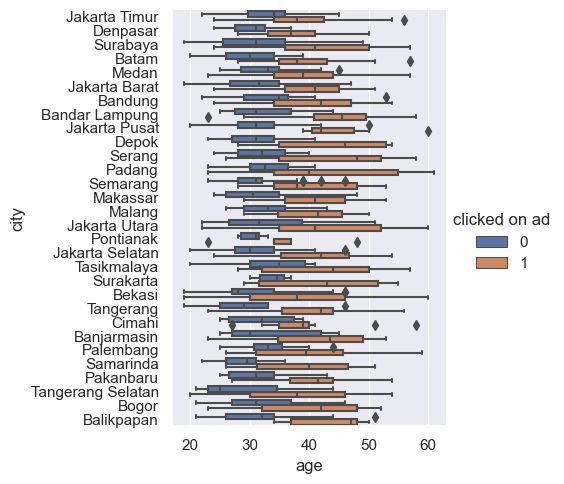

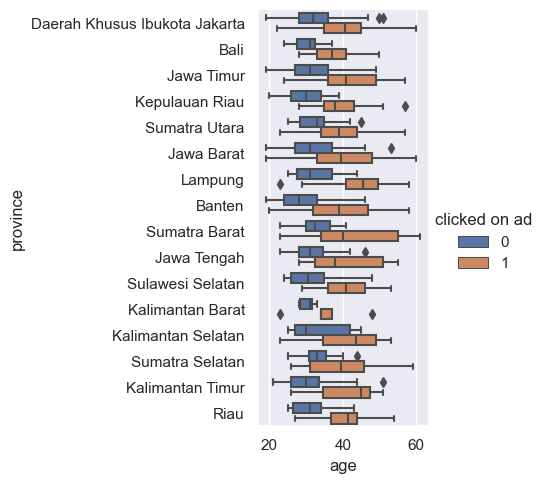

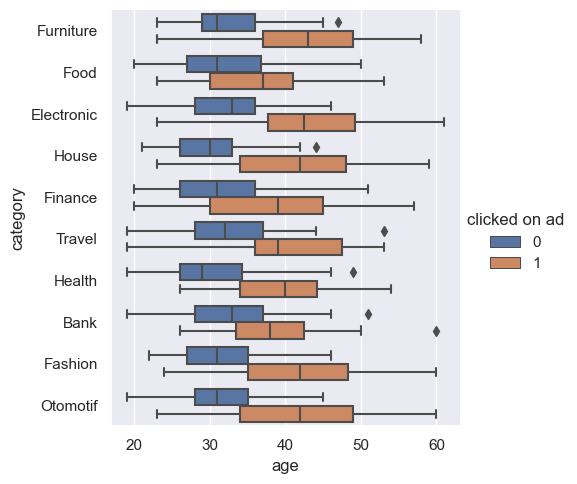

In [56]:
# age
sns.catplot(data=df, x="age", y="city", hue='clicked on ad', kind="box");
sns.catplot(data=df, x="age", y="province", hue='clicked on ad',kind="box");
sns.catplot(data=df, x="age", y="category", hue='clicked on ad',kind="box");

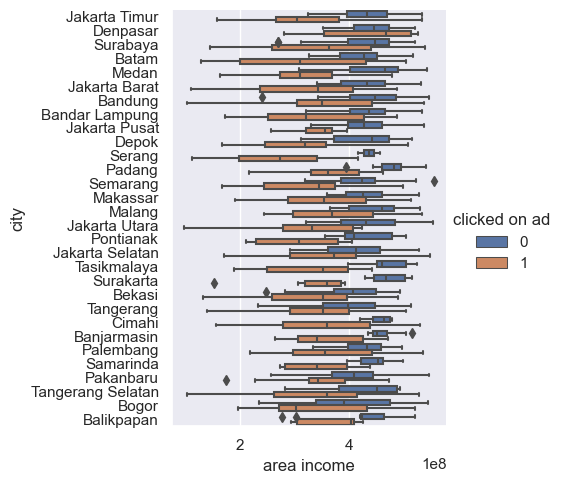

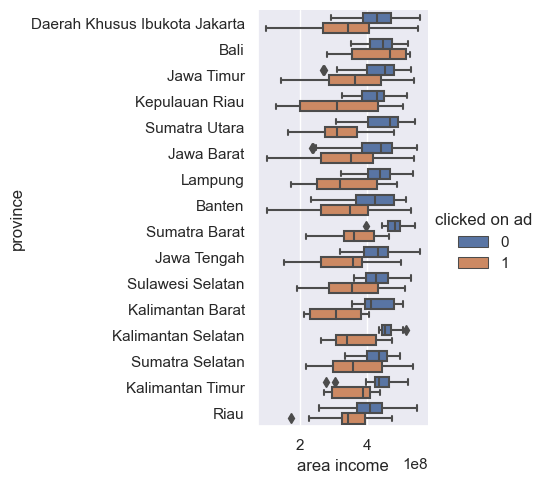

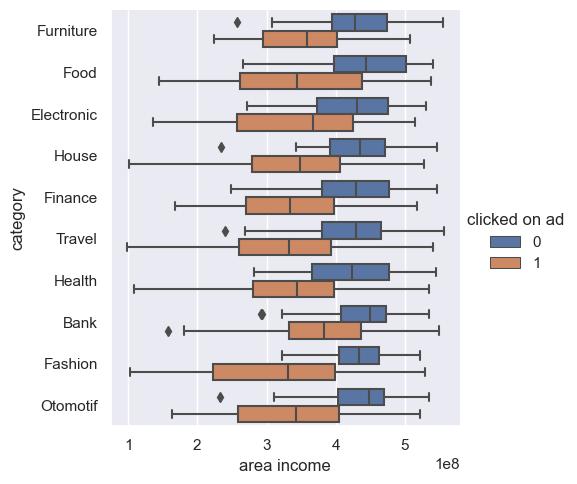

In [57]:
# area income
sns.catplot(data=df, x="area income", y="city", hue='clicked on ad', kind="box");
sns.catplot(data=df, x="area income", y="province", hue='clicked on ad',kind="box");
sns.catplot(data=df, x="area income", y="category", hue='clicked on ad',kind="box");

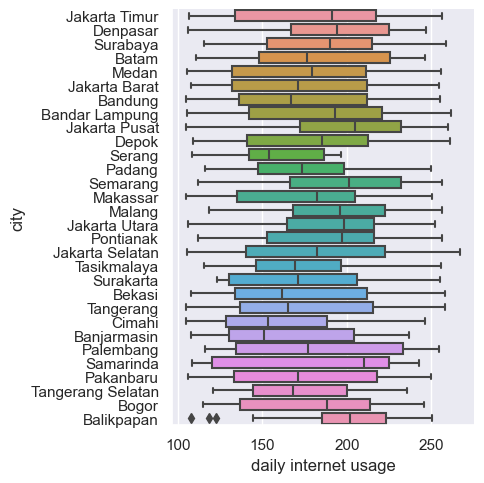

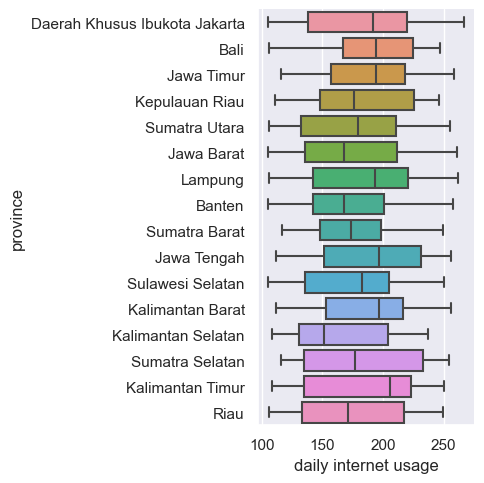

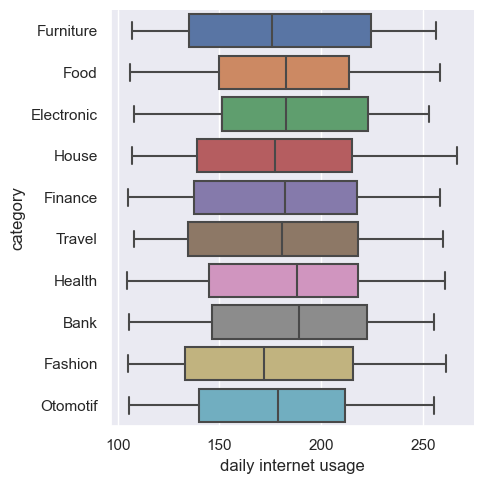

In [58]:
#  daily internet usage
sns.catplot(data=df, x="daily internet usage", y="city", kind="box");
sns.catplot(data=df, x="daily internet usage", y="province",kind="box");
sns.catplot(data=df, x="daily internet usage", y="category",kind="box");

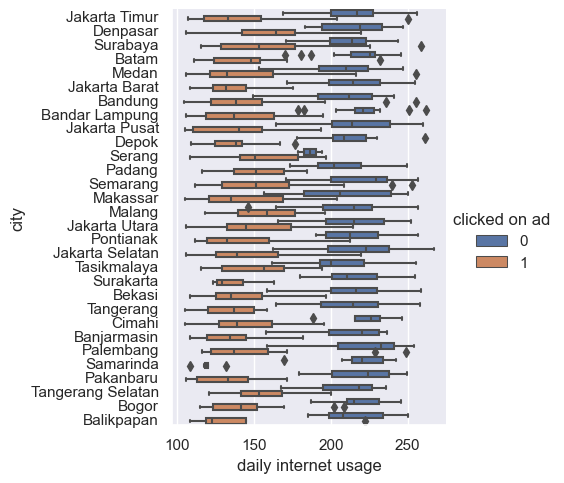

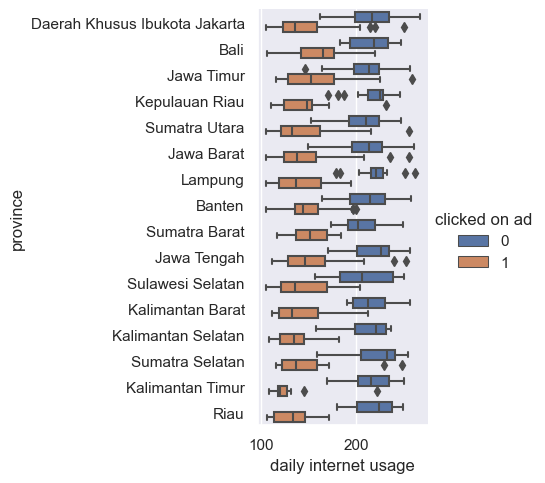

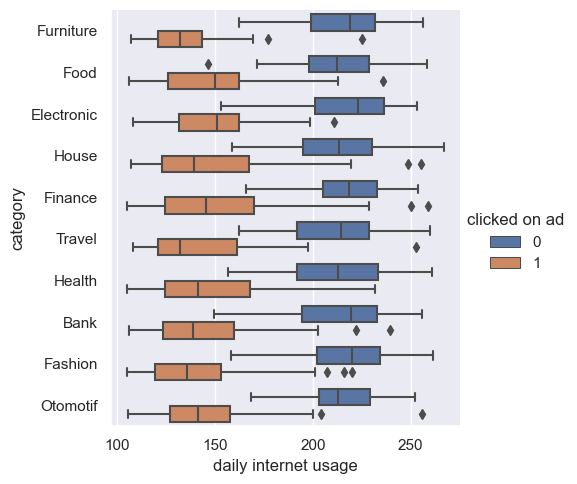

In [59]:
#  daily internet usage
sns.catplot(data=df, x="daily internet usage", y="city", hue='clicked on ad', kind="box");
sns.catplot(data=df, x="daily internet usage", y="province", hue='clicked on ad',kind="box");
sns.catplot(data=df, x="daily internet usage", y="category", hue='clicked on ad',kind="box");

### Summary on Analysis :
1. Ada outlier pada 'Area Income'
2. Negative Skewed :daily time spent on site & area income
3. Positive Skewed :age
4. Normal Distribution : daily internet usage & timestamp
5. Pada Pairplot : Daily Internet Usage 0 - 175 (terbanyak 0 - 150) menit ada kecendrungan mengklik iklan
6. Catplot 'daily internet usage' 0 - 175 dominan mengklik ads
7. Catplot 'area income' pada 0 - 3,5jt dominan mengklik ads
8. Catplot 'daily time spent on site' 0 - 67 menit dominan mengklik ads
7. Tidak ada yang diatas 0.7 atau -0,7 pada correlation heatmap
8. Wilayah Jakarta mayoritas tidak mengklik iklan

### Category Ads with the most clicked on City, Province

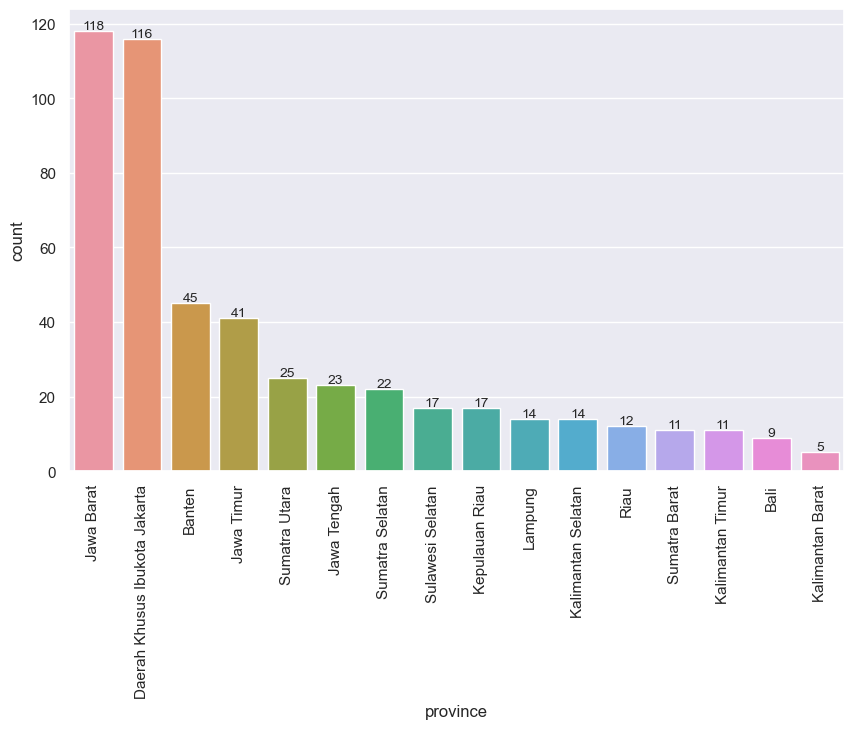

In [60]:
prov_counts1 = ad1['province'].value_counts()

sns.set(rc={"figure.figsize": (10, 6)})  # Adjust the figure size if needed
ax = sns.countplot(data=ad1, x='province',order=prov_counts1.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add annotations (count values) to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

In [61]:
jb1 = ad1[ad1['province'] == 'Jawa Barat'].groupby('category')['age'].count().reset_index()
jb1.rename(columns={'category':'Jawa Barat','age':'count'}, inplace=True)
jb1 = jb1.sort_values(by='count', ascending=False).reset_index(drop=True)
jb1

Jawa Barat  count
0        Food     19
1     Fashion     17
2    Otomotif     14
3      Health     13
4       House     11
5  Electronic     10
6      Travel     10
7     Finance      9
8   Furniture      9
9        Bank      6

In [62]:
dki1 = ad1[ad1['province'] == 'Daerah Khusus Ibukota Jakarta'].groupby('category')['age'].count().reset_index()
dki1.rename(columns={'category':'DKI','age':'count'}, inplace=True)
dki1 = dki1.sort_values(by='count', ascending=False).reset_index(drop=True)
dki1

DKI  count
0    Otomotif     16
1  Electronic     12
2     Finance     12
3   Furniture     12
4       House     12
5      Travel     12
6        Bank     11
7     Fashion     11
8        Food      9
9      Health      9

In [63]:
banten1 = ad1[ad1['province'] == 'Banten'].groupby('category')['age'].count().reset_index()
banten1.rename(columns={'category':'Banten','age':'count'}, inplace=True)
banten1 = banten1.sort_values(by='count', ascending=False).reset_index(drop=True)
banten1

Banten  count
0       House     10
1    Otomotif      7
2     Fashion      5
3      Health      5
4      Travel      5
5   Furniture      4
6        Bank      3
7  Electronic      3
8     Finance      2
9        Food      1

In [64]:
jtim1 = ad1[ad1['province'] == 'Jawa Timur'].groupby('category')['age'].count().reset_index()
jtim1.rename(columns={'category':'Jawa Timur','age':'count'}, inplace=True)
jtim1 = jtim1.sort_values(by='count', ascending=False).reset_index(drop=True)
jtim1

Jawa Timur  count
0      Travel      7
1        Food      6
2      Health      6
3       House      5
4     Fashion      4
5   Furniture      4
6  Electronic      3
7     Finance      3
8    Otomotif      2
9        Bank      1

# Tugas 2
## extract datetime data

In [65]:
df.head(5)

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp  clicked on ad           city  \
0 2016-03-27 00:53:00              0  Jakarta Timur   
1 2016-04-04 01:39:00              0       Denpasar   
2 2016-03-13 20:35:00              0       Surabaya   
3 2016-01-10 02:31:00              0          Batam   
4 2016-06-03 03:36:00              0          Medan   

                        province    category  
0  Daerah Khusus Ibukota Jakarta   Furniture  
1                           Bali        Food  
2                     Jawa Timur  Electronic  
3                 Kepulauan Riau       House  
4                  Sumatra Utara     Finance

In [66]:
# Extract df['timestamp'] into new coloumns

df['date'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['months'] = df['month'].replace({1:'January',
                                    2:'February',
                                    3:'March',
                                    4:'April',
                                    5:'May',
                                    6:'June',
                                    7:'July',
                                    8:'August',
                                    9:'September',
                                    10:'October',
                                    11:'November',
                                    12:'December'
                                   })
df['year'] = df['timestamp'].dt.year
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['week'] = df['timestamp'].dt.week

In [67]:
df.head()
df.info()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp  clicked on ad           city  \
0 2016-03-27 00:53:00              0  Jakarta Timur   
1 2016-04-04 01:39:00              0       Denpasar   
2 2016-03-13 20:35:00              0       Surabaya   
3 2016-01-10 02:31:00              0          Batam   
4 2016-06-03 03:36:00              0          Medan   

                        province    category  date  month   months  year  \
0  Daerah Khusus Ibukota Jakarta   Furniture    27      3    March  2016   
1                           Bali        Food     4      4    April  2016   
2                     Jawa Timur  Electronic    13      3    March  2016   
3                 Kepulauan Riau       House    10      1  January  2016   
4                  Sumatra Utara     Finance     3      6     June  2016   

   hour  minute  week  
0     0      53    12  
1     1      39    14  
2    20      35    10  
3     2      31     1  
4     3      36    22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily time spent on site  1000 non-null   float64       
 1   age                       1000 non-null   int64         
 2   area income               1000 non-null   float64       
 3   daily internet usage      1000 non-null   float64       
 4   male                      1000 non-null   int64         
 5   timestamp                 1000 non-null   datetime64[ns]
 6   clicked on ad             1000 non-null   int64         
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
 10  date                      1000 non-null   int64         
 11  month                     1000 non-null   int64         
 12  months               

In [68]:
df.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp  clicked on ad           city  \
0 2016-03-27 00:53:00              0  Jakarta Timur   
1 2016-04-04 01:39:00              0       Denpasar   
2 2016-03-13 20:35:00              0       Surabaya   
3 2016-01-10 02:31:00              0          Batam   
4 2016-06-03 03:36:00              0          Medan   

                        province    category  date  month   months  year  \
0  Daerah Khusus Ibukota Jakarta   Furniture    27      3    March  2016   
1                           Bali        Food     4      4    April  2016   
2                     Jawa Timur  Electronic    13      3    March  2016   
3                 Kepulauan Riau       House    10      1  January  2016   
4                  Sumatra Utara     Finance     3      6     June  2016   

   hour  minute  week  
0     0      53    12  
1     1      39    14  
2    20      35    10  
3     2      31     1  
4     3      36    22

In [69]:
df['minute'].nunique()
df['hour'].nunique()

60

24

In [70]:
# resplit category dataframe

nums = df.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns
cats = df.select_dtypes(include=['object']).columns

ad0 = df[df['clicked on ad'] == 0].drop('clicked on ad', axis=1)
ad1 = df[df['clicked on ad'] == 1].drop('clicked on ad', axis=1)

In [71]:
month = df.groupby(['year','months','month'])['age'].count().reset_index()
month.sort_values(by='month', ascending=True)

year    months  month  age
2  2016   January      1  147
1  2016  February      2  160
5  2016     March      3  156
0  2016     April      4  147
6  2016       May      5  147
4  2016      June      6  142
3  2016      July      7  101

In [72]:
month0 = ad0.groupby(['year','months','month'])['age'].count().reset_index()
month0.sort_values(by='month', ascending=True)

year    months  month  age
2  2016   January      1   78
1  2016  February      2   77
5  2016     March      3   82
0  2016     April      4   73
6  2016       May      5   68
4  2016      June      6   71
3  2016      July      7   51

In [73]:
month1 = ad1.groupby(['year','months','month'])['age'].count().reset_index()
month1.sort_values(by='month', ascending=True)

year    months  month  age
2  2016   January      1   69
1  2016  February      2   83
5  2016     March      3   74
0  2016     April      4   74
6  2016       May      5   79
4  2016      June      6   71
3  2016      July      7   50

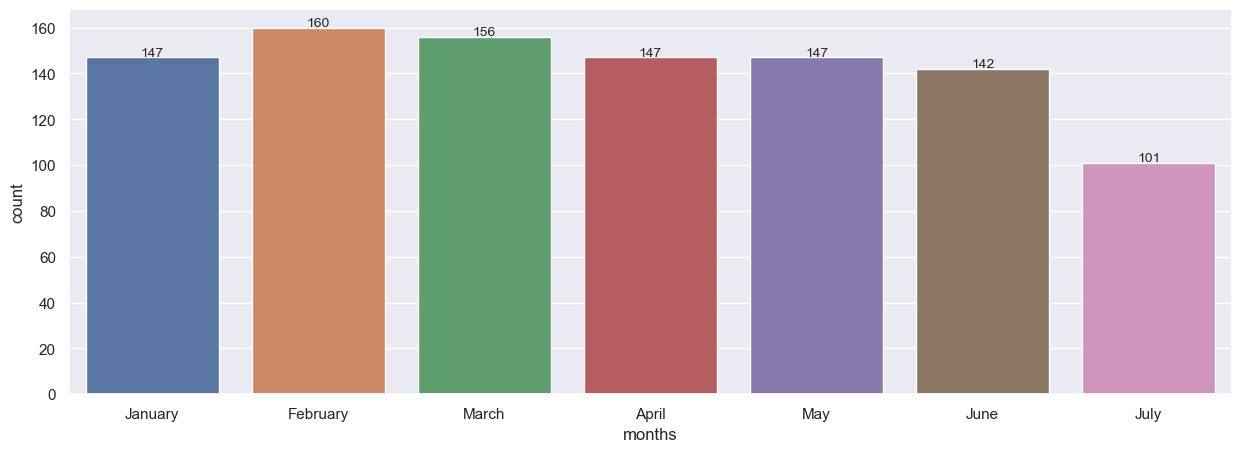

In [74]:
# months countplot

plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='months', data = df, order=['January', 'February','March','April','May','June','July'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

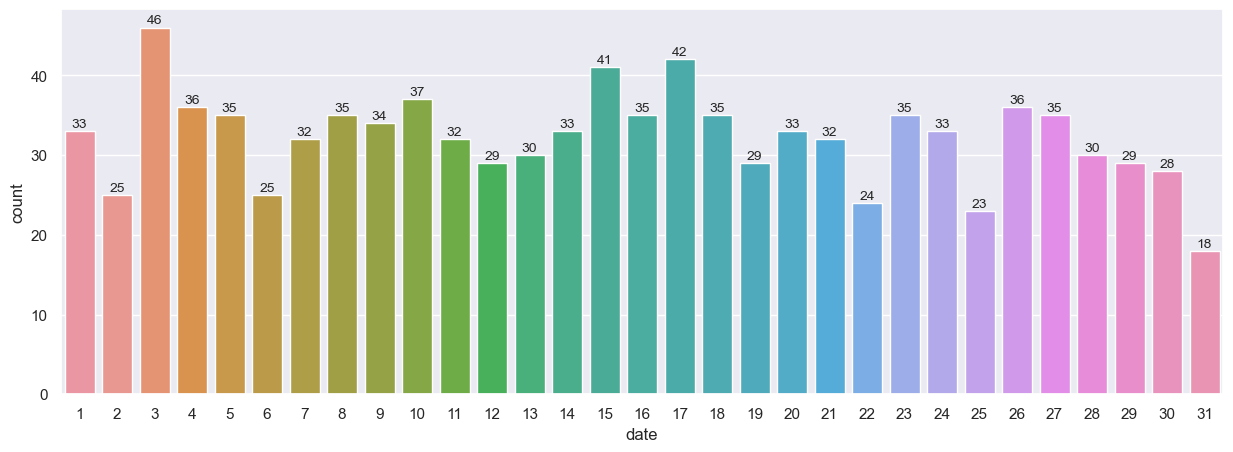

In [75]:
# date countplot

plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='date', data = df, order=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

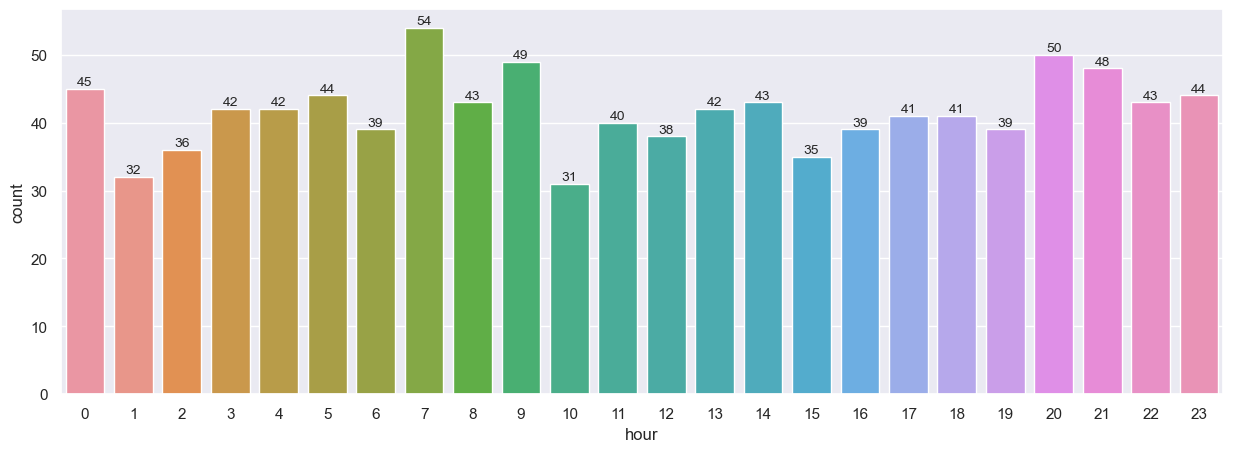

In [76]:
# hours countplot

plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='hour', data = df)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

In [77]:
df[nums].describe().round()

daily time spent on site     age   area income  daily internet usage  \
count                   1,000.0 1,000.0       1,000.0               1,000.0   
mean                       65.0    36.0 385,049,318.0                 180.0   
std                        16.0     9.0  93,479,714.0                  44.0   
min                        33.0    19.0  97,975,500.0                 105.0   
25%                        52.0    29.0 329,820,138.0                 139.0   
50%                        68.0    35.0 399,068,320.0                 183.0   
75%                        78.0    42.0 456,693,212.0                 218.0   
max                        91.0    61.0 556,393,600.0                 267.0   

         male  clicked on ad    date   month    year    hour  minute    week  
count 1,000.0        1,000.0 1,000.0 1,000.0 1,000.0 1,000.0 1,000.0 1,000.0  
mean      0.0            0.0    15.0     4.0 2,016.0    12.0    29.0    15.0  
std       0.0            1.0     9.0     2.0     0.0     7.0    17.0    10.0  
min       0.0            0.0     1.0     1.0 2,016.0     0.0     0.0     1.0  
25%       0.0            0.0     8.0     2.0 2,016.0     6.0    14.0     8.0  
50%       0.0            0.0    15.0     4.0 2,016.0    12.0    30.0    15.0  
75%       1.0            1.0    23.0     5.0 2,016.0    18.0    43.0    22.0  
max       1.0            1.0    31.0     7.0 2,016.0    23.0    59.0    53.0

In [78]:
#statistik df

df_stat = df.describe().round(2)

median = df[nums].median().to_frame().T
median.rename(index={0:'median'}, inplace=True)


modus = df[nums].mode().iloc[0].to_frame().T
modus.rename(index={0:'modus'}, inplace=True)

df_stat = pd.concat([df_stat, median, modus], axis=0).round(2)

df_stat

daily time spent on site     age    area income daily internet usage  \
count                   1,000.0 1,000.0        1,000.0              1,000.0   
mean                      64.97   36.01 385,049,318.08               179.89   
std                       15.75    8.79  93,479,713.55                43.63   
min                        32.6    19.0   97,975,500.0               104.78   
25%                       51.54    29.0  329,820,137.5               139.02   
50%                       68.11    35.0  399,068,320.0               182.65   
75%                       78.35    42.0  456,693,212.5               218.29   
max                       91.43    61.0  556,393,600.0               267.01   
median                    68.11    35.0  399,068,320.0               182.65   
modus                     68.11    31.0  399,068,320.0               182.65   

          male clicked on ad    date   month    year    hour  minute    week  \
count  1,000.0       1,000.0 1,000.0 1,000.0 1,000.0 1,000.0 1,000.0 1,000.0   
mean      0.48           0.5   15.48    3.82 2,016.0   11.66   29.05   15.42   
std        0.5           0.5    8.73    1.93     0.0    6.96   17.25    9.71   
min        0.0           0.0     1.0     1.0 2,016.0     0.0     0.0     1.0   
25%        0.0           0.0     8.0     2.0 2,016.0     6.0    14.0     8.0   
50%        0.0           0.5    15.0     4.0 2,016.0    12.0    30.0    15.0   
75%        1.0           1.0    23.0     5.0 2,016.0    18.0    43.0    22.0   
max        1.0           1.0    31.0     7.0 2,016.0    23.0    59.0    53.0   
median     0.0           0.5    15.0     4.0 2,016.0    12.0    30.0    15.0   
modus      0.0           0.0     3.0     2.0 2,016.0     7.0     2.0     6.0   

                 timestamp  
count                  NaT  
mean                   NaT  
std                    NaT  
min                    NaT  
25%                    NaT  
50%                    NaT  
75%                    NaT  
max                    NaT  
median                 NaT  
modus  2016-05-20 12:17:00

In [79]:
df.describe(include='object')

city                       province  category    months
count       1000                           1000      1000      1000
unique        30                             16        10         7
top     Surabaya  Daerah Khusus Ibukota Jakarta  Otomotif  February
freq          64                            253       112       160

### Timestamp Analysis

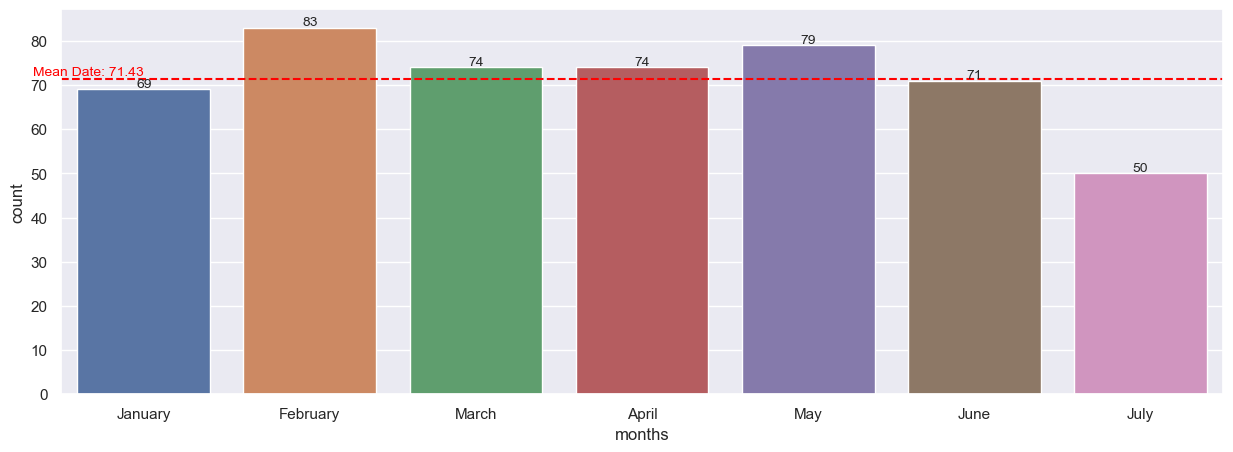

In [80]:
# months countplot
mt_mean = ad1['months'].value_counts().mean()

plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='months', data = ad1, order=['January', 'February','March','April','May','June','July'])

plt.axhline(y=mt_mean, color='red', linestyle='--', label=f'Mean Month: {mt_mean:.2f}')
ax.annotate(f'Mean Date: {mt_mean:.2f}', (0, mt_mean), color='red', ha='right', va='bottom', fontsize=10)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

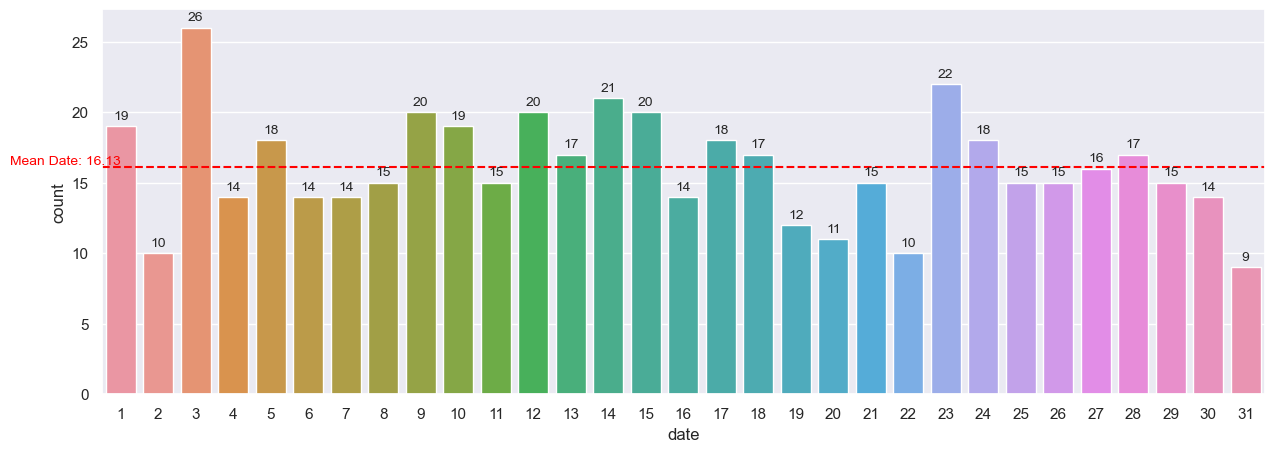

In [81]:
# date countplot
d_mean = ad1['date'].value_counts().mean()

plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='date', data = ad1)

plt.axhline(y=d_mean, color='red', linestyle='--', label=f'Mean Date: {d_mean:.2f}')
ax.annotate(f'Mean Date: {d_mean:.2f}', (0, d_mean), color='red', ha='right', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

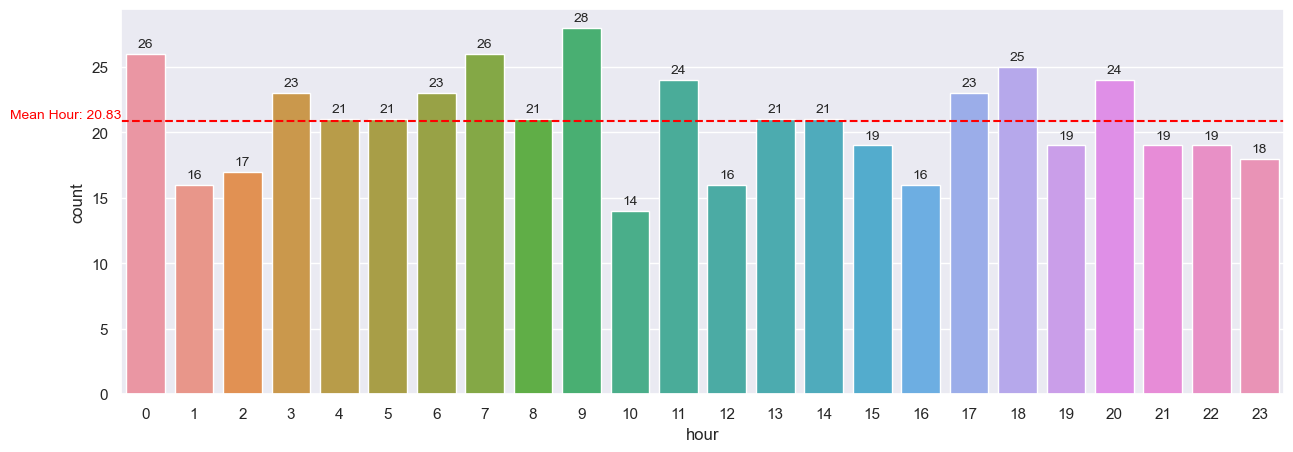

In [82]:
# hours countplot
h_mean = ad1['hour'].value_counts().mean()


plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='hour', data = ad1)

plt.axhline(y=h_mean, color='red', linestyle='--', label=f'Mean Hour: {h_mean:.2f}')
ax.annotate(f'Mean Hour: {h_mean:.2f}', (-0.5, h_mean), color='red', ha='right', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.5), ha='center', va='baseline', fontsize=10)

plt.show();

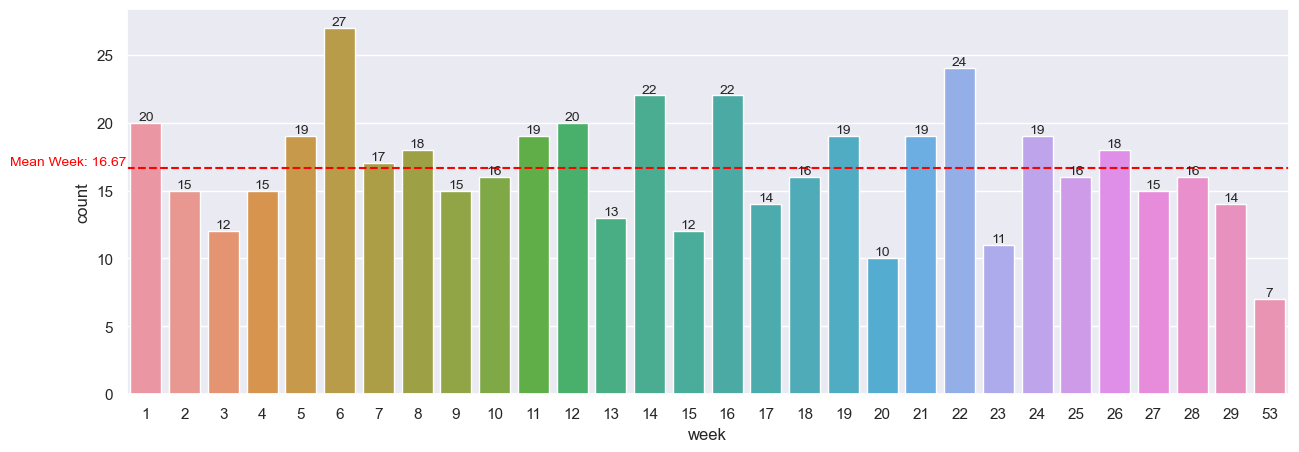

In [83]:
# hours countplot
h_mean = ad1['week'].value_counts().mean()


plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='week', data = ad1)

plt.axhline(y=h_mean, color='red', linestyle='--', label=f'Mean Week: {h_mean:.2f}')
ax.annotate(f'Mean Week: {h_mean:.2f}', (-0.5, h_mean), color='red', ha='right', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.2), ha='center', va='baseline', fontsize=10)

plt.show();

### Timestamp to Category Analysis

In [84]:
ad1['category'].value_counts()

Otomotif      59
House         57
Fashion       56
Finance       52
Food          49
Health        48
Electronic    48
Travel        47
Furniture     45
Bank          39
Name: category, dtype: int64

In [85]:
ot1 = ad1[ad1['category'] == 'Otomotif']

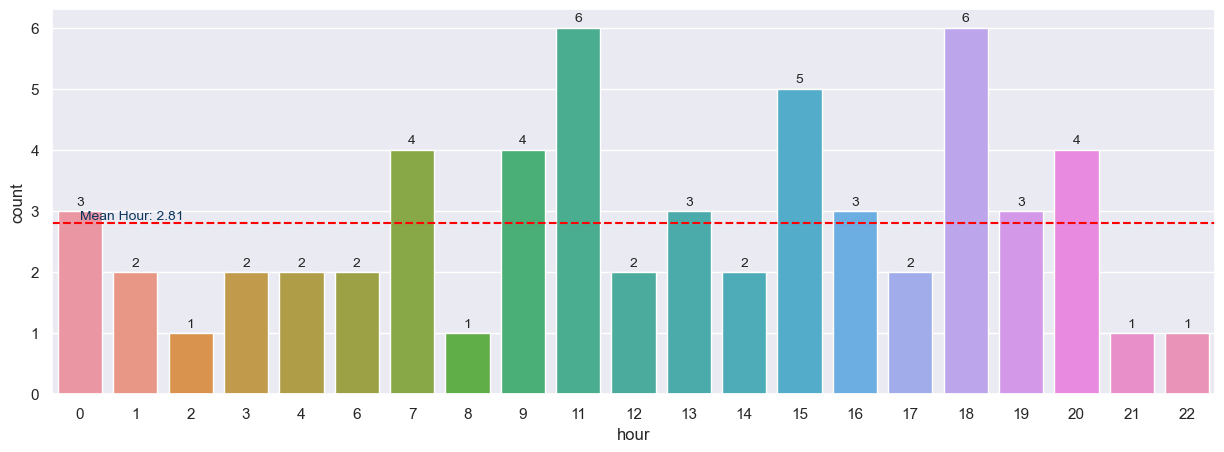

In [86]:
# hours countplot
ot1_mean = ot1['hour'].value_counts().mean()


plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='hour', data = ot1)

plt.axhline(y=ot1_mean, color='red', linestyle='--', label=f'Mean Hour: {ot1_mean:.2f}')
ax.annotate(f'Mean Hour: {ot1_mean:.2f}', (0, ot1_mean), color='#0e365c', ha='left', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), ha='center', va='baseline', fontsize=10)

plt.show();

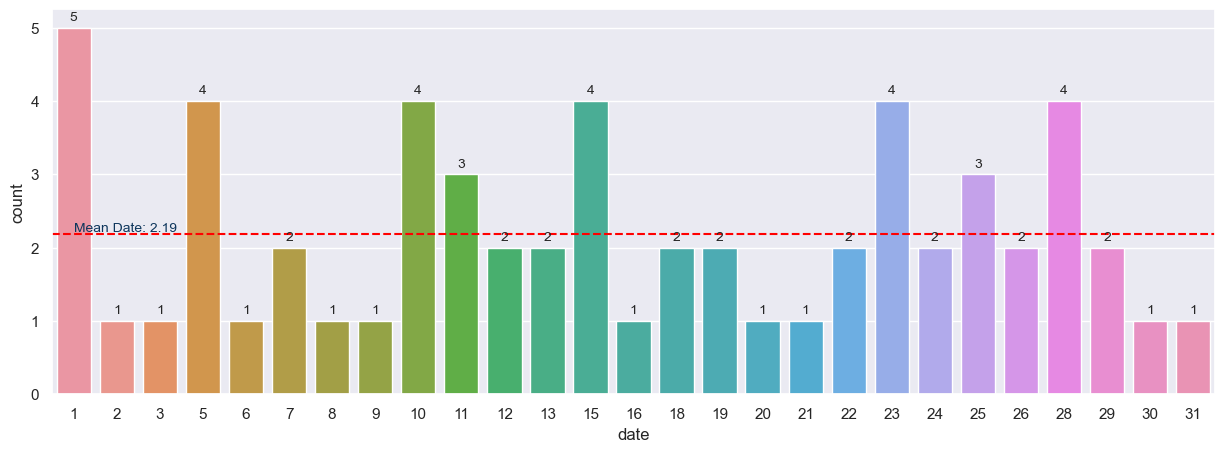

In [87]:
# date countplot
od1_mean = ot1['date'].value_counts().mean()


plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='date', data = ot1)

plt.axhline(y=od1_mean, color='red', linestyle='--', label=f'Mean Date: {od1_mean:.2f}')
ax.annotate(f'Mean Date: {od1_mean:.2f}', (0, od1_mean), color='#0e365c', ha='left', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), ha='center', va='baseline', fontsize=10)

plt.show();

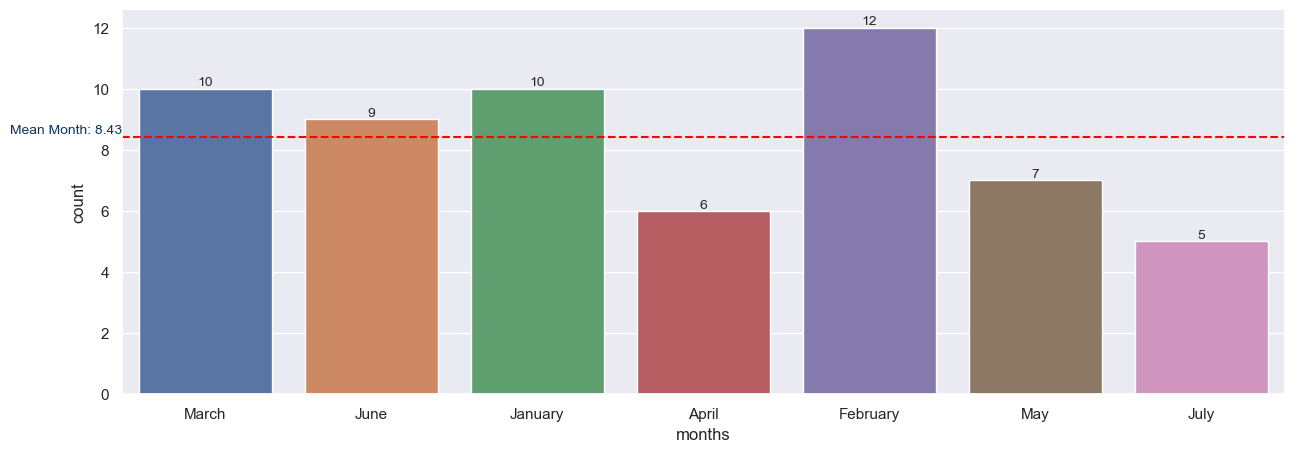

In [88]:
# months countplot
om1_mean = ot1['months'].value_counts().mean()


plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='months', data = ot1)

plt.axhline(y=om1_mean, color='red', linestyle='--', label=f'Mean Month: {om1_mean:.2f}')
ax.annotate(f'Mean Month: {om1_mean:.2f}', (-0.5, om1_mean), color='#0e365c', ha='right', va='bottom', fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height() + 0.1), ha='center', va='baseline', fontsize=10)

plt.show();

In [89]:
dx = df.copy()

In [90]:
dx.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp  clicked on ad           city  \
0 2016-03-27 00:53:00              0  Jakarta Timur   
1 2016-04-04 01:39:00              0       Denpasar   
2 2016-03-13 20:35:00              0       Surabaya   
3 2016-01-10 02:31:00              0          Batam   
4 2016-06-03 03:36:00              0          Medan   

                        province    category  date  month   months  year  \
0  Daerah Khusus Ibukota Jakarta   Furniture    27      3    March  2016   
1                           Bali        Food     4      4    April  2016   
2                     Jawa Timur  Electronic    13      3    March  2016   
3                 Kepulauan Riau       House    10      1  January  2016   
4                  Sumatra Utara     Finance     3      6     June  2016   

   hour  minute  week  
0     0      53    12  
1     1      39    14  
2    20      35    10  
3     2      31     1  
4     3      36    22

## Handling Outliers

In [91]:
do = df.drop('timestamp', axis=1)

In [92]:
# resplit category dataframe

nums = do.select_dtypes(include=['int', 'bool', 'float', 'datetime']).columns
cats = do.select_dtypes(include=['object']).columns

ad0 = do[do['clicked on ad'] == 0].drop('clicked on ad', axis=1)
ad1 = do[do['clicked on ad'] == 1].drop('clicked on ad', axis=1)

In [93]:
do_stat = do.describe().round(2)
do_stat = do_stat.T

In [94]:
do_stat['iqr'] = do_stat['75%'] - do_stat['25%']
do_stat['low_thres'] = do_stat['25%'] - (1.5 * do_stat['iqr'])
do_stat['hi_thres']  = do_stat['75%'] + (1.5 * do_stat['iqr'])

do_stat['low_tr/fl'] = do_stat['min'] < do_stat['low_thres']
do_stat['hi_tr/fl'] = do_stat['max'] > do_stat['hi_thres']

do_stat

count           mean           std          min  \
daily time spent on site 1,000.0          64.97         15.75         32.6   
age                      1,000.0          36.01          8.79         19.0   
area income              1,000.0 385,049,318.08 93,479,713.55 97,975,500.0   
daily internet usage     1,000.0         179.89         43.63       104.78   
male                     1,000.0           0.48           0.5          0.0   
clicked on ad            1,000.0            0.5           0.5          0.0   
date                     1,000.0          15.48          8.73          1.0   
month                    1,000.0           3.82          1.93          1.0   
year                     1,000.0        2,016.0           0.0      2,016.0   
hour                     1,000.0          11.66          6.96          0.0   
minute                   1,000.0          29.05         17.25          0.0   
week                     1,000.0          15.42          9.71          1.0   

                                   25%           50%           75%  \
daily time spent on site         51.54         68.11         78.35   
age                               29.0          35.0          42.0   
area income              329,820,137.5 399,068,320.0 456,693,212.5   
daily internet usage            139.02        182.65        218.29   
male                               0.0           0.0           1.0   
clicked on ad                      0.0           0.5           1.0   
date                               8.0          15.0          23.0   
month                              2.0           4.0           5.0   
year                           2,016.0       2,016.0       2,016.0   
hour                               6.0          12.0          18.0   
minute                            14.0          30.0          43.0   
week                               8.0          15.0          22.0   

                                   max                iqr          low_thres  \
daily time spent on site         91.43 26.809999999999995  11.32500000000001   
age                               61.0               13.0                9.5   
area income              556,393,600.0      126,873,075.0      139,510,525.0   
daily internet usage            267.01  79.26999999999998 20.115000000000038   
male                               1.0                1.0               -1.5   
clicked on ad                      1.0                1.0               -1.5   
date                              31.0               15.0              -14.5   
month                              7.0                3.0               -2.5   
year                           2,016.0                0.0            2,016.0   
hour                              23.0               12.0              -12.0   
minute                            59.0               29.0              -29.5   
week                              53.0               14.0              -13.0   

                                   hi_thres  low_tr/fl  hi_tr/fl  
daily time spent on site 118.56499999999998      False     False  
age                                    61.5      False     False  
area income                   647,002,825.0       True     False  
daily internet usage     337.19499999999994      False     False  
male                                    2.5      False     False  
clicked on ad                           2.5      False     False  
date                                   45.5      False     False  
month                                   9.5      False     False  
year                                2,016.0      False     False  
hour                                   36.0      False     False  
minute                                 86.5      False     False  
week                                   43.0      False      True

In [95]:
print(f'Jumlah Outlier pada Area Income :',dx[dx['area income'] <= 141919347].shape[0],'baris')

Jumlah Outlier pada Area Income : 10 baris


In [96]:
do = do[do['area income'] >= 141919347]
do.shape[0]

990

<Axes: xlabel='area income'>

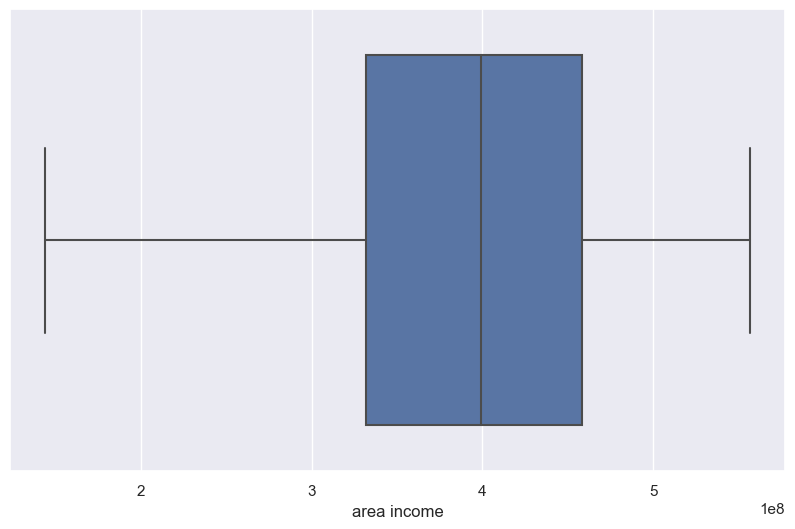

In [97]:
sns.boxplot(data=do, x='area income')

## dataframe clean after handling outliers

In [98]:
di = do.copy()

In [99]:
di.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

   clicked on ad           city                       province    category  \
0              0  Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture   
1              0       Denpasar                           Bali        Food   
2              0       Surabaya                     Jawa Timur  Electronic   
3              0          Batam                 Kepulauan Riau       House   
4              0          Medan                  Sumatra Utara     Finance   

   date  month   months  year  hour  minute  week  
0    27      3    March  2016     0      53    12  
1     4      4    April  2016     1      39    14  
2    13      3    March  2016    20      35    10  
3    10      1  January  2016     2      31     1  
4     3      6     June  2016     3      36    22

## OHE City

In [100]:
dh = pd.get_dummies(di['city'], prefix_sep='_', prefix='city')
dh.head()

city_Balikpapan  city_Bandar Lampung  city_Bandung  city_Banjarmasin  \
0                0                    0             0                 0   
1                0                    0             0                 0   
2                0                    0             0                 0   
3                0                    0             0                 0   
4                0                    0             0                 0   

   city_Batam  city_Bekasi  city_Bogor  city_Cimahi  city_Denpasar  \
0           0            0           0            0              0   
1           0            0           0            0              1   
2           0            0           0            0              0   
3           1            0           0            0              0   
4           0            0           0            0              0   

   city_Depok  city_Jakarta Barat  city_Jakarta Pusat  city_Jakarta Selatan  \
0           0                   0                   0                     0   
1           0                   0                   0                     0   
2           0                   0                   0                     0   
3           0                   0                   0                     0   
4           0                   0                   0                     0   

   city_Jakarta Timur  city_Jakarta Utara  city_Makassar  city_Malang  \
0                   1                   0              0            0   
1                   0                   0              0            0   
2                   0                   0              0            0   
3                   0                   0              0            0   
4                   0                   0              0            0   

   city_Medan  city_Padang  city_Pakanbaru  city_Palembang  city_Pontianak  \
0           0            0               0               0               0   
1           0            0               0               0               0   
2           0            0               0               0               0   
3           0            0               0               0               0   
4           1            0               0               0               0   

   city_Samarinda  city_Semarang  city_Serang  city_Surabaya  city_Surakarta  \
0               0              0            0              0               0   
1               0              0            0              0               0   
2               0              0            0              1               0   
3               0              0            0              0               0   
4               0              0            0              0               0   

   city_Tangerang  city_Tangerang Selatan  city_Tasikmalaya  
0               0                       0                 0  
1               0                       0                 0  
2               0                       0                 0  
3               0                       0                 0  
4               0                       0                 0

In [101]:
dh = pd.concat([di,dh], axis=1)
dh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily time spent on site  990 non-null    float64
 1   age                       990 non-null    int64  
 2   area income               990 non-null    float64
 3   daily internet usage      990 non-null    float64
 4   male                      990 non-null    int64  
 5   clicked on ad             990 non-null    int64  
 6   city                      990 non-null    object 
 7   province                  990 non-null    object 
 8   category                  990 non-null    object 
 9   date                      990 non-null    int64  
 10  month                     990 non-null    int64  
 11  months                    990 non-null    object 
 12  year                      990 non-null    int64  
 13  hour                      990 non-null    int64  
 14  minute    

## Feature Encoding

In [102]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# define column has type Object to implement LabelEncoder
list_object = dh.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    dh[col] = encoder.fit_transform(di[col].values.tolist())

## Feature Selection
Menggunakan Mutual Information

In [103]:
# getting the Mutual Information about the data
X_mutual = dh.astype("int64").reset_index(drop=True).copy()
y_mutual = X_mutual.pop("clicked on ad")

#del X_mutual["id"]

# all discrete features should now have integer dtypes
discrete_features = X_mutual.dtypes == int

# mi scores function
def make_mi_scores(X_mutual, y_mutual, discrete_features):
    mi_scores = mutual_info_classif(X_mutual, y_mutual, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mutual.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_mutual, y_mutual, discrete_features)
mi_scores.to_frame().head(10)

mi_scores.to_frame()

MI Scores
area income                0.6834388781607652
daily internet usage       0.4881965709138747
daily time spent on site  0.39563970665769665
age                       0.16134769205387492
minute                   0.028794744293678162
city                      0.01717555083508341
date                     0.014052014559409333
week                     0.008980605797282569
hour                     0.008463198710795483
province                 0.007365896201672998

MI Scores
area income                  0.6834388781607652
daily internet usage         0.4881965709138747
daily time spent on site    0.39563970665769665
age                         0.16134769205387492
minute                     0.028794744293678162
city                        0.01717555083508341
date                       0.014052014559409333
week                       0.008980605797282569
hour                       0.008463198710795483
province                   0.007365896201672998
category                   0.003381246583892425
city_Jakarta Pusat        0.0032500626291318627
city_Cimahi               0.0026701100301096646
city_Serang               0.0020278380898220896
city_Malang               0.0019424593658465966
city_Balikpapan           0.0018111520427846715
city_Tangerang Selatan    0.0009064236690843955
month                     0.0007634604225638109
months                    0.0007634604225638109
city_Jakarta Utara        0.0006898403434567463
male                       0.000679163082383416
city_Bandung              0.0006481261214004302
city_Banjarmasin          0.0006198787345087498
city_Semarang             0.0005603377549613375
city_Samarinda           0.00047809876641079566
city_Tasikmalaya          0.0003416121501298615
city_Bekasi              0.00030041103285341486
city_Padang               0.0002771278163532162
city_Depok               0.00023808755108997715
city_Denpasar            0.00019171585990800794
city_Pontianak           0.00015117299670693377
city_Tangerang           0.00012164695416596455
city_Bogor                9.679751601726627e-05
city_Palembang            7.382075419490319e-05
city_Medan                6.829091958140965e-05
city_Surabaya              5.90960959325898e-05
city_Pakanbaru            3.414753295481049e-05
city_Makassar             2.814920042369662e-05
city_Bandar Lampung       8.972833220044496e-06
city_Batam                7.038685398183531e-06
city_Jakarta Barat        3.058892942775504e-06
city_Jakarta Selatan     1.3001260502909506e-06
city_Jakarta Timur       1.1322612417236089e-06
city_Surakarta            6.259857345362885e-07
year                                        0.0

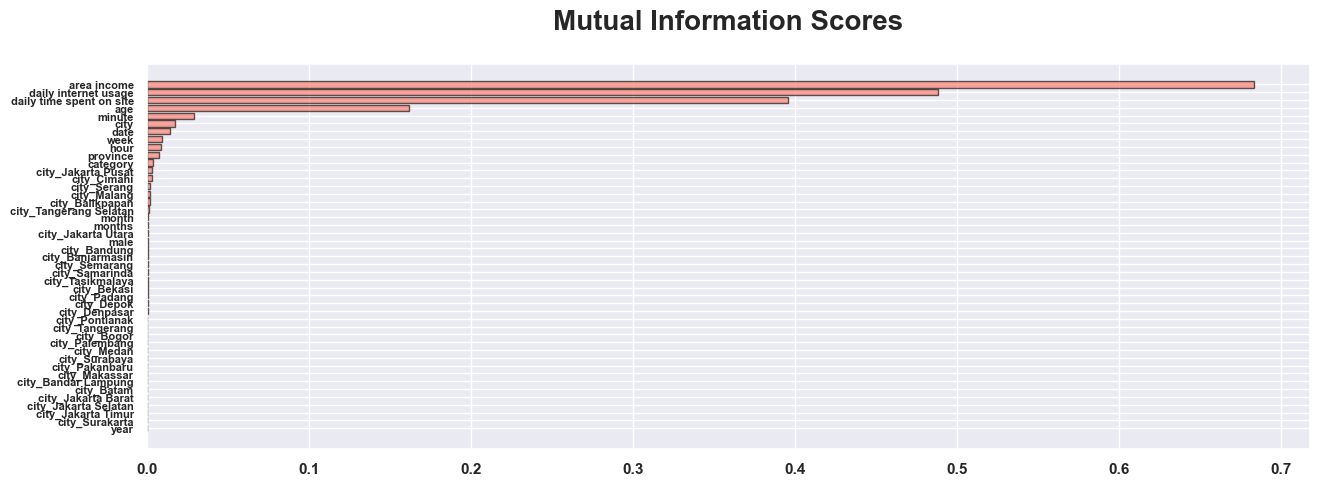

In [104]:
# variables
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
# plotting
plt.figure(figsize=(15, 5))
plt.barh(width, scores, color="salmon", alpha=0.7, edgecolor="k")
plt.yticks(width, ticks, weight="bold", fontsize=8 )
plt.xticks(weight="bold")
plt.title("Mutual Information Scores",
          weight="bold",
          fontsize=20,
          pad=25);

In [105]:
ftsel = mi_scores.to_frame().reset_index()
ftsel = ftsel[ftsel['MI Scores'] >= 0.0009]
ftsel

ftsel['index'].unique()

index             MI Scores
0                area income    0.6834388781607652
1       daily internet usage    0.4881965709138747
2   daily time spent on site   0.39563970665769665
3                        age   0.16134769205387492
4                     minute  0.028794744293678162
5                       city   0.01717555083508341
6                       date  0.014052014559409333
7                       week  0.008980605797282569
8                       hour  0.008463198710795483
9                   province  0.007365896201672998
10                  category  0.003381246583892425
11        city_Jakarta Pusat 0.0032500626291318627
12               city_Cimahi 0.0026701100301096646
13               city_Serang 0.0020278380898220896
14               city_Malang 0.0019424593658465966
15           city_Balikpapan 0.0018111520427846715
16    city_Tangerang Selatan 0.0009064236690843955

array(['area income', 'daily internet usage', 'daily time spent on site',
       'age', 'minute', 'city', 'date', 'week', 'hour', 'province',
       'category', 'city_Jakarta Pusat', 'city_Cimahi', 'city_Serang',
       'city_Malang', 'city_Balikpapan', 'city_Tangerang Selatan'],
      dtype=object)

### Feature Selection :
1. 'area income', 
2.  'daily internet usage', 
3. 'daily time spent on site',
4. 'age', 
5. 'minute', 
6. 'date', 
7. 'week', 
8. 'hour', 
9. 'province', 
10. 'category',
11. 'city_Jakarta Pusat', 
12. 'city_Cimahi', 
13. 'city_Serang', 
14. 'city_Malang',
15. 'city_Balikpapan', 
16. 'city_Tangerang Selatan'
17. 'clicked on ad'

In [106]:
dh.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

   clicked on ad  city  province  category  date  month  months  year  hour  \
0              0    13         2         5    27      3       5  2016     0   
1              0     8         0         4     4      4       0  2016     1   
2              0    25         5         1    13      3       5  2016    20   
3              0     4         9         7    10      1       2  2016     2   
4              0    17        15         3     3      6       4  2016     3   

   minute  week  city_Balikpapan  city_Bandar Lampung  city_Bandung  \
0      53    12                0                    0             0   
1      39    14                0                    0             0   
2      35    10                0                    0             0   
3      31     1                0                    0             0   
4      36    22                0                    0             0   

   city_Banjarmasin  city_Batam  city_Bekasi  city_Bogor  city_Cimahi  \
0                 0           0            0           0            0   
1                 0           0            0           0            0   
2                 0           0            0           0            0   
3                 0           1            0           0            0   
4                 0           0            0           0            0   

   city_Denpasar  city_Depok  city_Jakarta Barat  city_Jakarta Pusat  \
0              0           0                   0                   0   
1              1           0                   0                   0   
2              0           0                   0                   0   
3              0           0                   0                   0   
4              0           0                   0                   0   

   city_Jakarta Selatan  city_Jakarta Timur  city_Jakarta Utara  \
0                     0                   1                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   

   city_Makassar  city_Malang  city_Medan  city_Padang  city_Pakanbaru  \
0              0            0           0            0               0   
1              0            0           0            0               0   
2              0            0           0            0               0   
3              0            0           0            0               0   
4              0            0           1            0               0   

   city_Palembang  city_Pontianak  city_Samarinda  city_Semarang  city_Serang  \
0               0               0               0              0            0   
1               0               0               0              0            0   
2               0               0               0              0            0   
3               0               0               0              0            0   
4               0               0               0              0            0   

   city_Surabaya  city_Surakarta  city_Tangerang  city_Tangerang Selatan  \
0              0               0               0                       0   
1              0               0               0                       0   
2              1               0               0                       0   
3              0               0               0                       0   
4              0               0             

#### feature 'city' drop

In [107]:
ftsel

index             MI Scores
0                area income    0.6834388781607652
1       daily internet usage    0.4881965709138747
2   daily time spent on site   0.39563970665769665
3                        age   0.16134769205387492
4                     minute  0.028794744293678162
5                       city   0.01717555083508341
6                       date  0.014052014559409333
7                       week  0.008980605797282569
8                       hour  0.008463198710795483
9                   province  0.007365896201672998
10                  category  0.003381246583892425
11        city_Jakarta Pusat 0.0032500626291318627
12               city_Cimahi 0.0026701100301096646
13               city_Serang 0.0020278380898220896
14               city_Malang 0.0019424593658465966
15           city_Balikpapan 0.0018111520427846715
16    city_Tangerang Selatan 0.0009064236690843955

In [108]:
dh = dh[['area income', 'daily internet usage', 'daily time spent on site',
       'age', 'minute', 'date', 'week', 'hour', 'province', 'category',
       'city_Jakarta Pusat', 'city_Cimahi', 'city_Serang', 'city_Malang',
       'city_Balikpapan', 'city_Tangerang Selatan', 'clicked on ad']]
dh.sample(3)

area income  daily internet usage  daily time spent on site  age  \
292 535,924,130.0                159.46                      55.2   39   
636 328,517,210.0                110.84                     59.36   49   
194 345,278,360.0                254.05                      77.2   33   

     minute  date  week  hour  province  category  city_Jakarta Pusat  \
292      36    30    22     7        14         0                   0   
636      12     1    26     1         2         8                   0   
194      36    12     6    20         1         6                   0   

     city_Cimahi  city_Serang  city_Malang  city_Balikpapan  \
292            0            0            0                0   
636            0            0            0                0   
194            0            0            0                0   

     city_Tangerang Selatan  clicked on ad  
292                       0              1  
636                       0              1  
194                       0              0

## Import Library Model

In [109]:
#------------ import library -------------#

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# modeling data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate

# predictive model algorithm classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier

# predictive model algorithm regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import CatBoostRegressor
#from sklearn.ensemble import XGBRegressor

# model scoring & evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# hyperparameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


## Split Data

In [110]:
featsel = dh.columns.tolist()
featsel = [col for col in dh.columns if col != 'clicked on ad']
featsel

['area income',
 'daily internet usage',
 'daily time spent on site',
 'age',
 'minute',
 'date',
 'week',
 'hour',
 'province',
 'category',
 'city_Jakarta Pusat',
 'city_Cimahi',
 'city_Serang',
 'city_Malang',
 'city_Balikpapan',
 'city_Tangerang Selatan']

In [111]:
dm = dh.copy() # untuk minmaxscaler
ds = dh.copy() # untuk standardscaler
dn = dh.copy() # untuk data normal tanpa scaler

In [112]:
df.sample()
ds.sample(5)

daily time spent on site  age   area income  daily internet usage  male  \
182                     62.95   60 257,265,680.0                157.04     0   

              timestamp  clicked on ad           city  \
182 2016-05-24 13:30:00              1  Jakarta Pusat   

                          province  category  date  month months  year  hour  \
182  Daerah Khusus Ibukota Jakarta  Otomotif    24      5    May  2016    13   

     minute  week  
182      30    21

area income  daily internet usage  daily time spent on site  age  \
666 447,756,120.0                230.36                      75.0   29   
895 248,653,160.0                207.53                     80.99   26   
507 427,477,820.0                121.07                     49.99   41   
405 388,357,340.0                248.16                     81.58   41   
688 494,909,170.0                230.52                     74.58   36   

     minute  date  week  hour  province  category  city_Jakarta Pusat  \
666      29    16     7     2         1         4                   0   
895      56    10    23     3         3         3                   0   
507      34    24    12     9        12         5                   0   
405      55    27     4    17         2         9                   0   
688       5    22    29    11         2         1                   0   

     city_Cimahi  city_Serang  city_Malang  city_Balikpapan  \
666            0            0            0                0   
895            0            0            0                0   
507            0            0            0                0   
405            0            0            0                0   
688            0            0            0                0   

     city_Tangerang Selatan  clicked on ad  
666                       0              0  
895                       0              0  
507                       0              1  
405                       0              0  
688                       0              0

## Standard Scaler

In [113]:
featsel

['area income',
 'daily internet usage',
 'daily time spent on site',
 'age',
 'minute',
 'date',
 'week',
 'hour',
 'province',
 'category',
 'city_Jakarta Pusat',
 'city_Cimahi',
 'city_Serang',
 'city_Malang',
 'city_Balikpapan',
 'city_Tangerang Selatan']

In [114]:
minmax = MinMaxScaler()
dm[featsel] = minmax.fit_transform(dm[featsel])

In [115]:
X = dm[featsel]
y = dm['clicked on ad']

## Train Test Split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [117]:
print(f'Total X Train :',X_train.shape[0])
print(f'Total y Train :',y_train.shape[0])

Total X Train : 742
Total y Train : 742


In [118]:

print(f'Total X Test :',X_test.shape[0])
print(f'Total y Test :',y_test.shape[0])

Total X Test : 248
Total y Test : 248


In [119]:
X_train.sample()
y_train.sample()

area income  daily internet usage  daily time spent on site  \
407 0.23090205582066503   0.22967391974357387        0.2741798402175759   

                    age             minute                date  week  \
407 0.19047619047619047 0.3898305084745763 0.26666666666666666   0.5   

                  hour            province           category  \
407 0.6956521739130435 0.13333333333333333 0.5555555555555556   

     city_Jakarta Pusat  city_Cimahi  city_Serang  city_Malang  \
407                 0.0          0.0          0.0          0.0   

     city_Balikpapan  city_Tangerang Selatan  
407              0.0                     0.0

663    1
Name: clicked on ad, dtype: int64

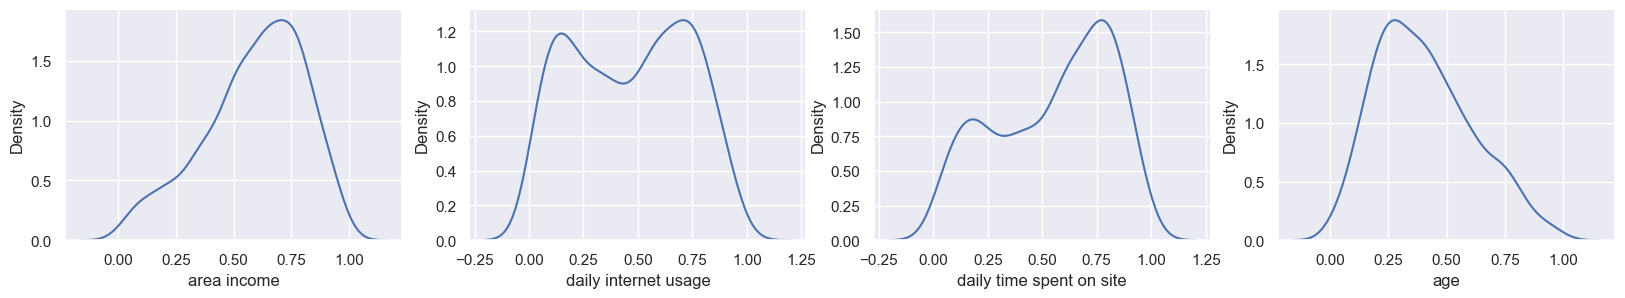

In [120]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))  # Membuat 1 baris dengan 4 subplot

sns.kdeplot(data=dm, x='area income', ax=axes[0])
sns.kdeplot(data=dm, x='daily internet usage', ax=axes[1])
sns.kdeplot(data=dm, x='daily time spent on site', ax=axes[2])
sns.kdeplot(data=dm, x='age', ax=axes[3])

plt.show();

# Tugas 3

## Setelah MinMax

### Logistic Regression

In [121]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train, y_train)
predictions_LR = LR.predict(X_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))

cf_matrix = confusion_matrix(predictions_LR, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_LR))

LogisticRegression()


Logistic regression accuracy: 0.9838709677419355

Confusion Matrix:
[[124   4]
 [  0 120]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       1.00      0.97      0.98       124

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



              precision    recall  f1-score   support

           0       0.97      1.00      0.98       124
           1       1.00      0.97      0.98       124

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



<Axes: >

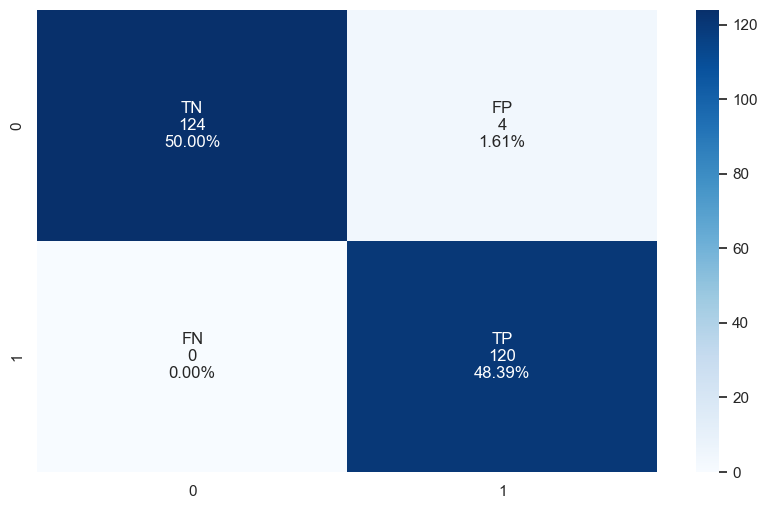

In [122]:
print(classification_report(y_test, predictions_LR))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### DecisionTreeCl

In [123]:
# Predictive Model
# DecisionTreeCls

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_DT = dtc.predict(X_test)

print('\nDecisionTreeClassifier accuracy:', accuracy_score(predictions_DT, y_test))
cf_matrix = confusion_matrix(predictions_DT, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_DT))

DecisionTreeClassifier()


DecisionTreeClassifier accuracy: 0.9354838709677419

Confusion Matrix:
[[113   5]
 [ 11 119]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       124
           1       0.92      0.96      0.94       124

    accuracy                           0.94       248
   macro avg       0.94      0.94      0.94       248
weighted avg       0.94      0.94      0.94       248



              precision    recall  f1-score   support

           0       0.96      0.91      0.93       124
           1       0.92      0.96      0.94       124

    accuracy                           0.94       248
   macro avg       0.94      0.94      0.94       248
weighted avg       0.94      0.94      0.94       248



<Axes: >

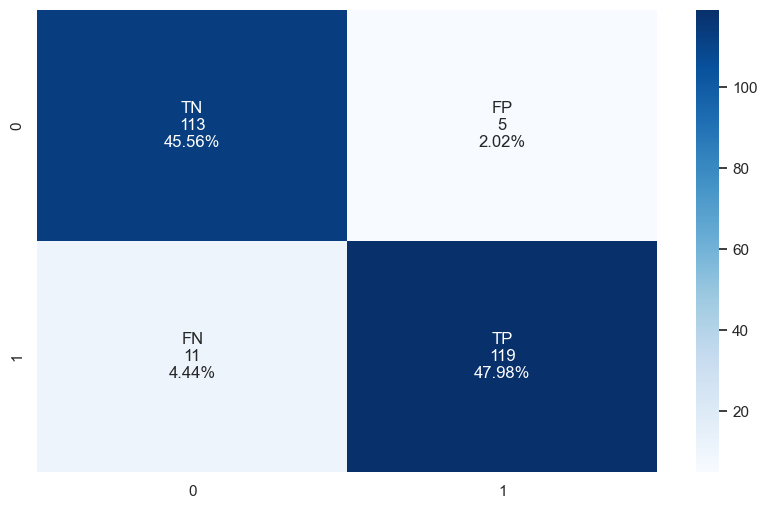

In [124]:
print(classification_report(y_test, predictions_DT))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [125]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

print('\nRandomForest accuracy:', accuracy_score(predictions_rf, y_test))
cf_matrix = confusion_matrix(predictions_rf, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_rf))

RandomForestClassifier()


RandomForest accuracy: 0.9758064516129032

Confusion Matrix:
[[121   3]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.98      0.98      0.98       124

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.98      0.98      0.98       124

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



<Axes: >

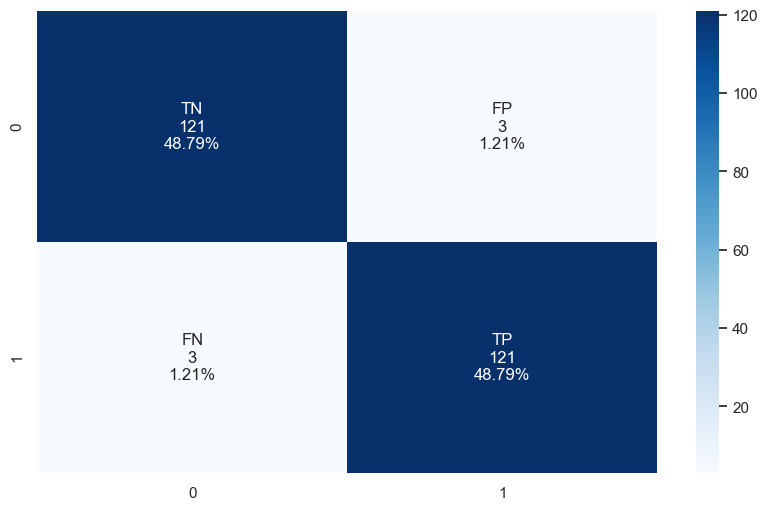

In [126]:
print(classification_report(y_test, predictions_rf))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### KNN

In [127]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

print('\nKNN accuracy:', accuracy_score(predictions_knn, y_test))

cf_matrix = confusion_matrix(predictions_knn, y_test)  # Change predictions_DT to predictions_knn
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_knn))  # Change predictions_DT to predictions_knn

KNeighborsClassifier()


KNN accuracy: 0.9475806451612904

Confusion Matrix:
[[124  13]
 [  0 111]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       124
           1       1.00      0.90      0.94       124

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



<Axes: >

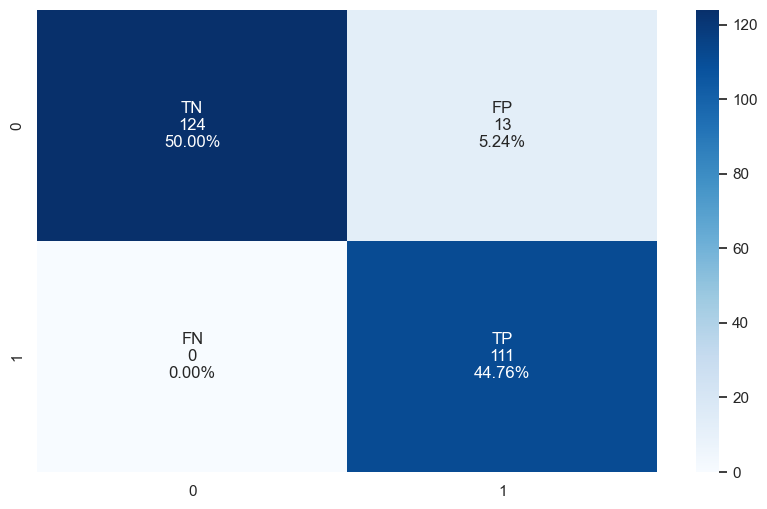

In [128]:
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape((2, 2))  # Corrected reshape syntax
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### XGBClassifier

In [129]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions_XGB = xgb.predict(X_test)

print('\nXGBClassifier accuracy:', accuracy_score(predictions_XGB, y_test))
cf_matrix = confusion_matrix(predictions_XGB, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_XGB))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBClassifier accuracy: 0.9596774193548387

Confusion Matrix:
[[120   6]
 [  4 118]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.97      0.95      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.97      0.95      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



<Axes: >

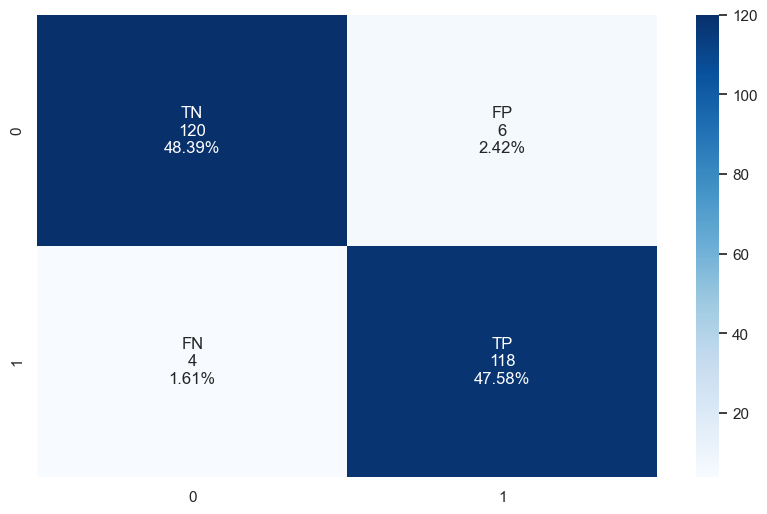

In [130]:
print(classification_report(y_test, predictions_XGB))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Tanpa MinMax

In [131]:
Xa = dn[featsel]
ya = dn['clicked on ad']

In [132]:
X_train0,X_test0,y_train0,y_test0=train_test_split(Xa,ya,test_size=0.25,random_state=42)

In [133]:
print(f'Total X Train :',X_train0.shape[0])
print(f'Total y Train :',y_train0.shape[0])

print(f'Total X Test :',X_test0.shape[0])
print(f'Total y Test :',y_test0.shape[0])

Total X Train : 742
Total y Train : 742
Total X Test : 248
Total y Test : 248


In [134]:
X_train0.sample()
y_train0.sample()

area income  daily internet usage  daily time spent on site  age  \
708 507,877,580.0                176.78                     46.89   48   

     minute  date  week  hour  province  category  city_Jakarta Pusat  \
708      22    17    28    13         3         5                   0   

     city_Cimahi  city_Serang  city_Malang  city_Balikpapan  \
708            0            0            0                0   

     city_Tangerang Selatan  
708                       0

407    1
Name: clicked on ad, dtype: int64

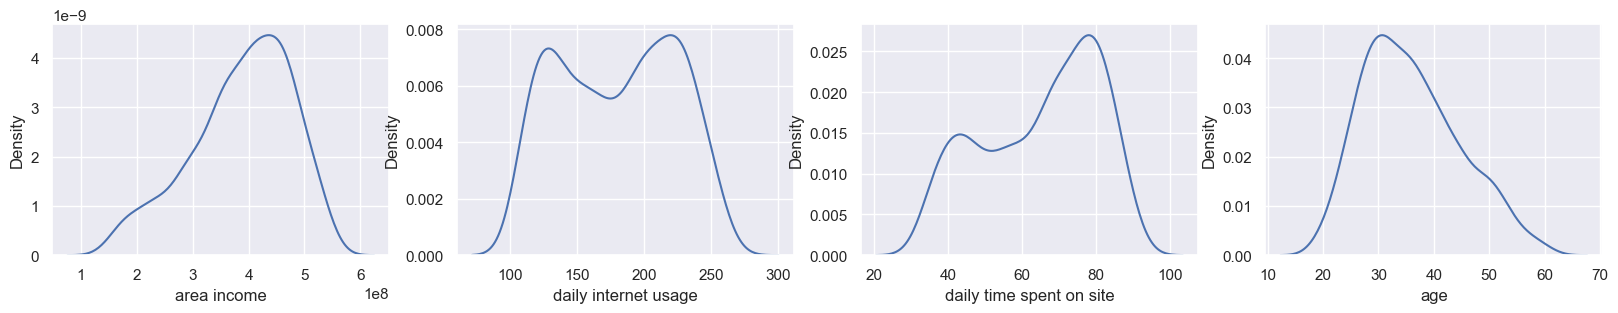

In [135]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))  # Membuat 1 baris dengan 4 subplot

sns.kdeplot(data=dn, x='area income', ax=axes[0])
sns.kdeplot(data=dn, x='daily internet usage', ax=axes[1])
sns.kdeplot(data=dn, x='daily time spent on site', ax=axes[2])
sns.kdeplot(data=dn, x='age', ax=axes[3])

plt.show();

### Logistic Regression

In [136]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train0, y_train0)
predictions_LR = LR.predict(X_test0)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test0))

cf_matrix = confusion_matrix(predictions_LR, y_test0)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test0, predictions_LR))

LogisticRegression()


Logistic regression accuracy: 0.5

Confusion Matrix:
[[124 124]
 [  0   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       124
           1       0.00      0.00      0.00       124

    accuracy                           0.50       248
   macro avg       0.25      0.50      0.33       248
weighted avg       0.25      0.50      0.33       248



              precision    recall  f1-score   support

           0       0.50      1.00      0.67       124
           1       0.00      0.00      0.00       124

    accuracy                           0.50       248
   macro avg       0.25      0.50      0.33       248
weighted avg       0.25      0.50      0.33       248



<Axes: >

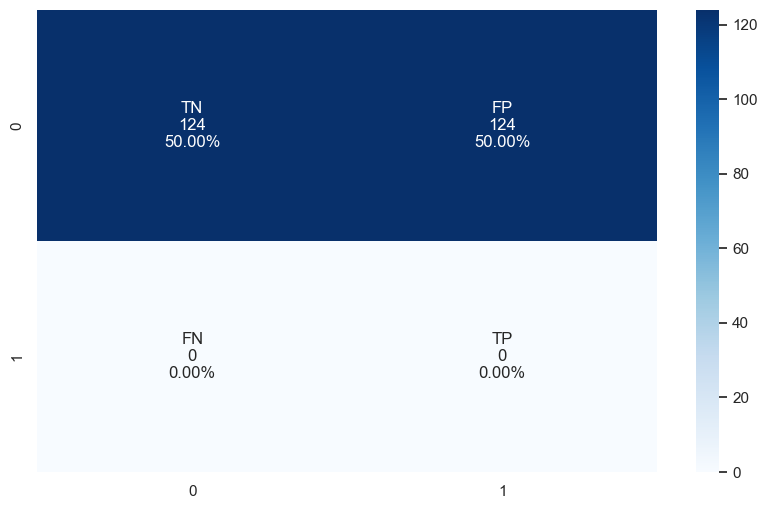

In [137]:
print(classification_report(y_test0, predictions_LR))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Decision Tree

In [138]:
# Predictive Model
# DecisionTreeCls

dtc = DecisionTreeClassifier()
dtc.fit(X_train0, y_train0)
predictions_DT = dtc.predict(X_test0)

print('\nDecisionTreeClassifier accuracy:', accuracy_score(predictions_DT, y_test0))
cf_matrix = confusion_matrix(predictions_DT, y_test0)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test0, predictions_DT))

DecisionTreeClassifier()


DecisionTreeClassifier accuracy: 0.9475806451612904

Confusion Matrix:
[[115   4]
 [  9 120]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       124
           1       0.93      0.97      0.95       124

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



              precision    recall  f1-score   support

           0       0.97      0.93      0.95       124
           1       0.93      0.97      0.95       124

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



<Axes: >

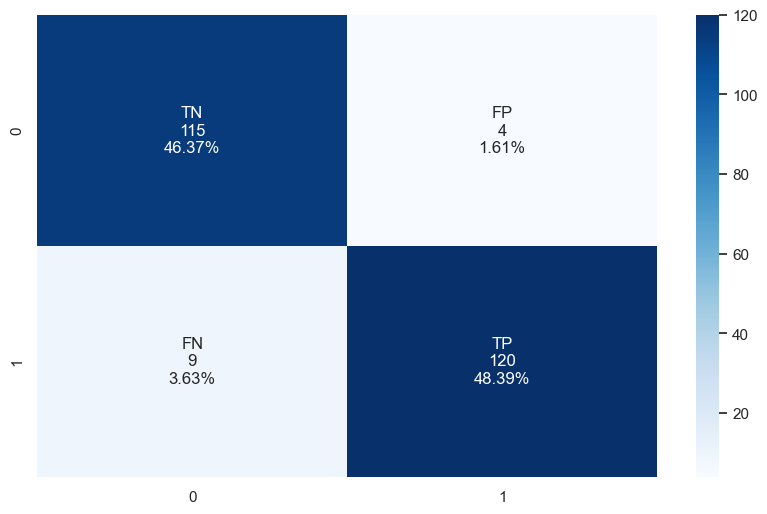

In [139]:
print(classification_report(y_test0, predictions_DT))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [140]:
rf = RandomForestClassifier()
rf.fit(X_train0, y_train0)
predictions_rf = rf.predict(X_test0)  # Change predictions_knn to predictions_rf

print('\nRandomForestClassifier accuracy:', accuracy_score(predictions_rf, y_test0))  # Change predictions_knn to predictions_rf

cf_matrix = confusion_matrix(predictions_rf, y_test0)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test0, predictions_rf))  # Change predictions_knn to predictions_rf

RandomForestClassifier()


RandomForestClassifier accuracy: 0.9717741935483871

Confusion Matrix:
[[121   4]
 [  3 120]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       124
           1       0.98      0.97      0.97       124

    accuracy                           0.97       248
   macro avg       0.97      0.97      0.97       248
weighted avg       0.97      0.97      0.97       248



<Axes: >

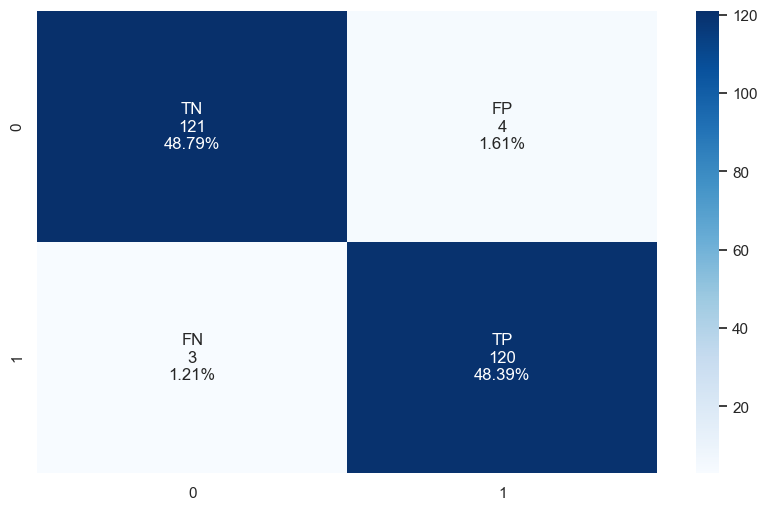

In [141]:
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### KNN

In [142]:
knn = KNeighborsClassifier()
knn.fit(X_train0, y_train0)
predictions_knn = knn.predict(X_test0)

print('\nKNeighborsClassifier accuracy:', accuracy_score(predictions_knn, y_test0))
cf_matrix = confusion_matrix(predictions_DT, y_test0)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test0, predictions_knn))

KNeighborsClassifier()


KNeighborsClassifier accuracy: 0.657258064516129

Confusion Matrix:
[[115   4]
 [  9 120]]
              precision    recall  f1-score   support

           0       0.63      0.76      0.69       124
           1       0.70      0.56      0.62       124

    accuracy                           0.66       248
   macro avg       0.66      0.66      0.65       248
weighted avg       0.66      0.66      0.65       248



              precision    recall  f1-score   support

           0       0.63      0.76      0.69       124
           1       0.70      0.56      0.62       124

    accuracy                           0.66       248
   macro avg       0.66      0.66      0.65       248
weighted avg       0.66      0.66      0.65       248



<Axes: >

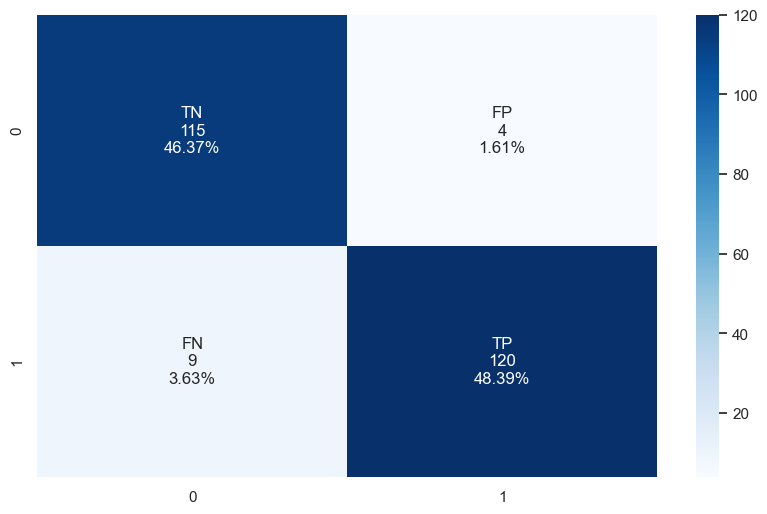

In [143]:
print(classification_report(y_test0, predictions_knn))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### XGBClassifier

In [144]:
xgb = XGBClassifier()
xgb.fit(X_train0, y_train0)
predictions_XGB = xgb.predict(X_test0)

print('\nXGBClassifier accuracy:', accuracy_score(predictions_XGB, y_test0))
cf_matrix = confusion_matrix(predictions_XGB, y_test0)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test0, predictions_XGB))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBClassifier accuracy: 0.9596774193548387

Confusion Matrix:
[[120   6]
 [  4 118]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.97      0.95      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



              precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.97      0.95      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



<Axes: >

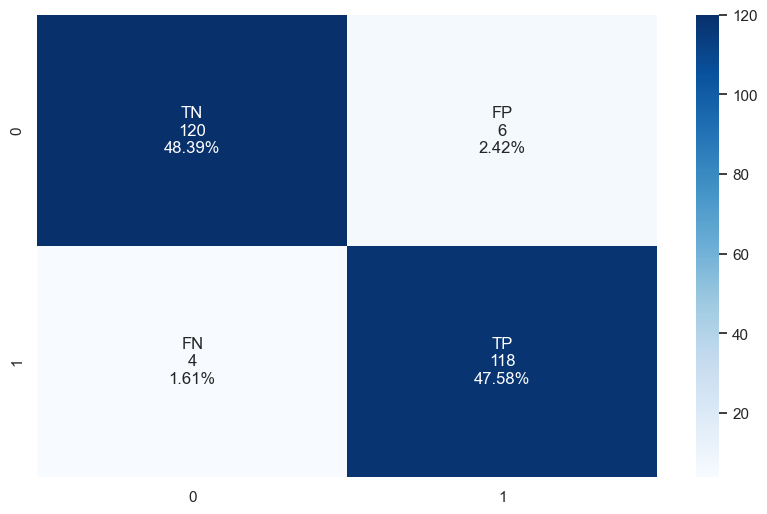

In [145]:
print(classification_report(y_test0, predictions_XGB))
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Visualisasi Antar Model

LR: 0.504745 (0.109503)
DTC: 0.933359 (0.054951)
RF: 0.959412 (0.037274)
KNN: 0.656099 (0.097412)
XGB: 0.961482 (0.041719)


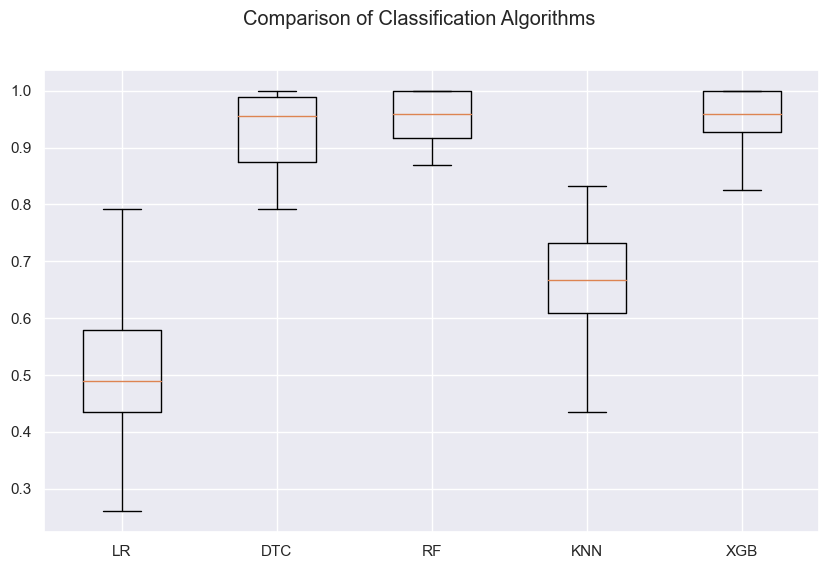

In [146]:
# Setting parameters
num_folds = 10
seed = 7

# Creating empty list 
models = []

# Machine Learning Algorithms list
models.append(('LR', LogisticRegression())) 
models.append(('DTC', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', XGBClassifier()))

# Evaluating each model in a loop
results = [] # result list
names = []   # names list
for name, model in models: 
    kfold = KFold(n_splits = 42, random_state = None)
    cv_results = cross_val_score(model, 
                                 Xa, 
                                 ya, 
                                 cv = kfold, 
                                 scoring = 'accuracy')

    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot results
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Visualisasi Model Tanpa Standarisasi

### Visualisasi Model Dengan Standarisasi

LR: 0.964458 (0.042687)
DTC: 0.929348 (0.050476)
RF: 0.961396 (0.034762)
KNN: 0.946256 (0.053435)
XGB: 0.961482 (0.041719)


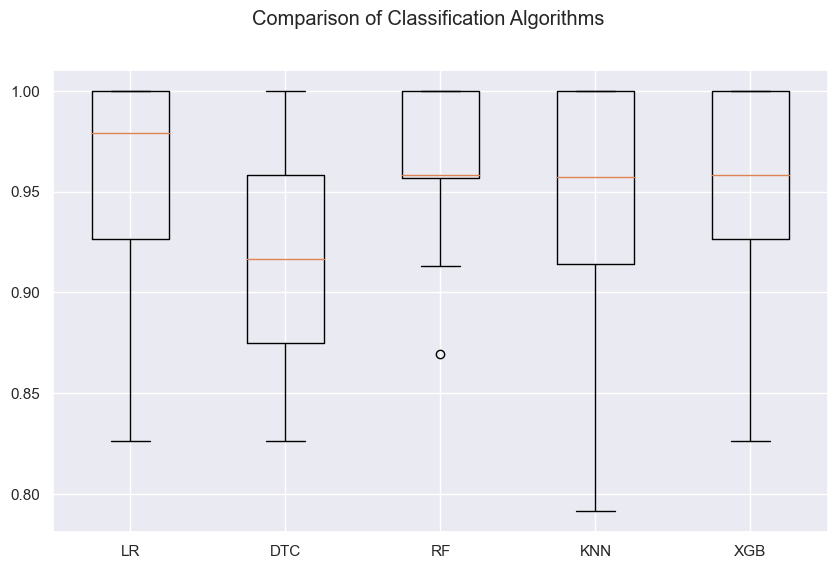

In [147]:
# Setting parameters
num_folds = 10
seed = 7

# Creating empty list 
models = []

# Machine Learning Algorithms list
# Machine Learning Algorithms list
models.append(('LR', LogisticRegression())) 
models.append(('DTC', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', XGBClassifier()))

# Evaluating each model in a loop
results = [] # result list
names = []   # names list
for name, model in models: 
    kfold = KFold(n_splits = 42, random_state = None)
    cv_results = cross_val_score(model, 
                                 X, 
                                 y, 
                                 cv = kfold, 
                                 scoring = 'accuracy')

    results.append(cv_results) 
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot results
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

## Feature Importance

### XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


XGBClassifier accuracy: 0.9596774193548387

Confusion Matrix:
[[120   6]
 [  4 118]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       124
           1       0.97      0.95      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



<Axes: >

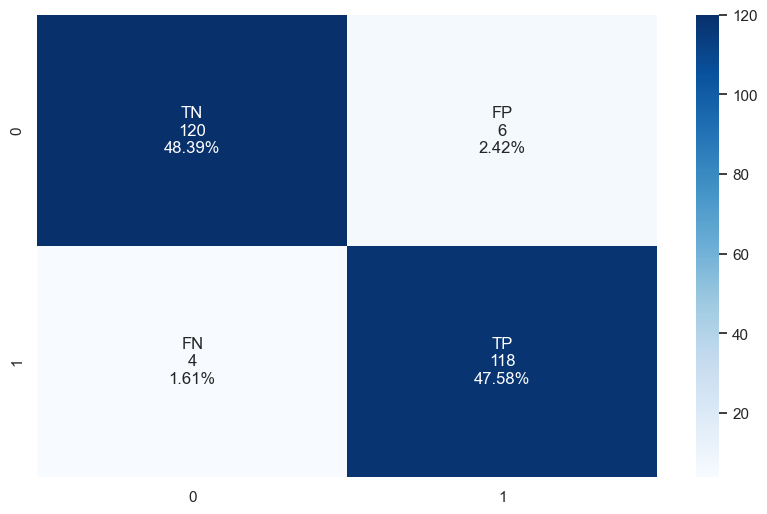

In [148]:
# menggunakan XGBoost karena konsisten baik dengan maupun tanpa scaler

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
predictions_XGB = xgb.predict(X_test)

print('\nXGBClassifier accuracy:', accuracy_score(predictions_XGB, y_test))
cf_matrix = confusion_matrix(predictions_XGB, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_XGB))

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [237]:
# Assuming you already have the confusion matrix 'cf_matrix' and the classification report as strings
# Convert the confusion matrix to a DataFrame
cf_df = pd.DataFrame(cf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Convert the classification report to a DataFrame
classification_report_str = classification_report(y_test, predictions_XGB, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_str).transpose()

# Now you have the confusion matrix and classification report in DataFrames
print("Confusion Matrix:")
cf_df
print("\nClassification Report:")
classification_report_df.round(4)


Confusion Matrix:


Predicted 0  Predicted 1
Actual 0          120            6
Actual 1            4          118


Classification Report:


precision  recall  f1-score  support
0                0.9524  0.9677      0.96    124.0
1                0.9672  0.9516    0.9593    124.0
accuracy         0.9597  0.9597    0.9597   0.9597
macro avg        0.9598  0.9597    0.9597    248.0
weighted avg     0.9598  0.9597    0.9597    248.0

In [238]:
# Assuming you have predictions_XGB as y_pred
y_pred_xgb = pd.DataFrame(predictions_XGB, columns=['Predicted'])

# Display the DataFrame
y_pred_xgb.shape[0]
y_pred_xgb.head()


248

Predicted
0          0
1          1
2          1
3          0
4          1

### Feature Importance

In [149]:
# Get feature importances
feature_importances = xgb.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_features = importance_df.head(10)
top_features


Feature           Importance
0      daily internet usage   0.6048209071159363
1  daily time spent on site  0.18079645931720734
2               area income  0.05553075671195984
3                       age 0.040533870458602905
4                  province  0.03080485761165619
5                  category 0.022497721016407013
6                      hour 0.018578359857201576
7                    minute  0.01834065653383732
8                      date 0.014399674721062183
9                      week 0.013696707785129547

In [150]:
df['area income'].describe().round(2)
df['area income'].nunique()
df['area income'].mode()

count          1,000.0
mean    385,049,318.08
std      93,479,713.55
min       97,975,500.0
25%      329,820,137.5
50%      399,068,320.0
75%      456,693,212.5
max      556,393,600.0
Name: area income, dtype: float64

987

0   399,068,320.0
Name: area income, dtype: float64

### Shap (1)

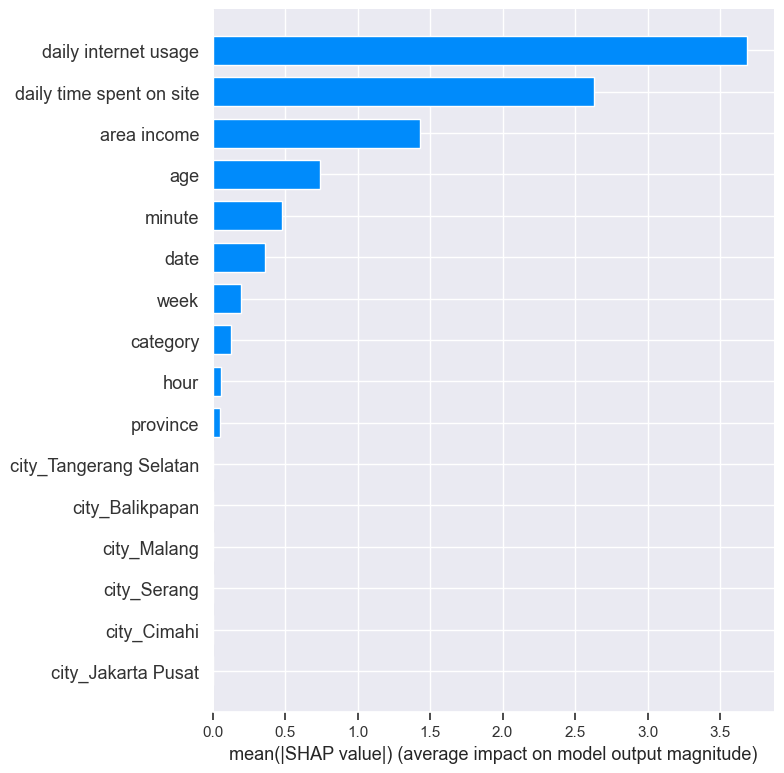

In [151]:
import shap

explainer = shap.TreeExplainer(xgb)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar");

### Shap (2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Text(0.5, 1.0, 'SHAP Summary Plot for XGBoost')

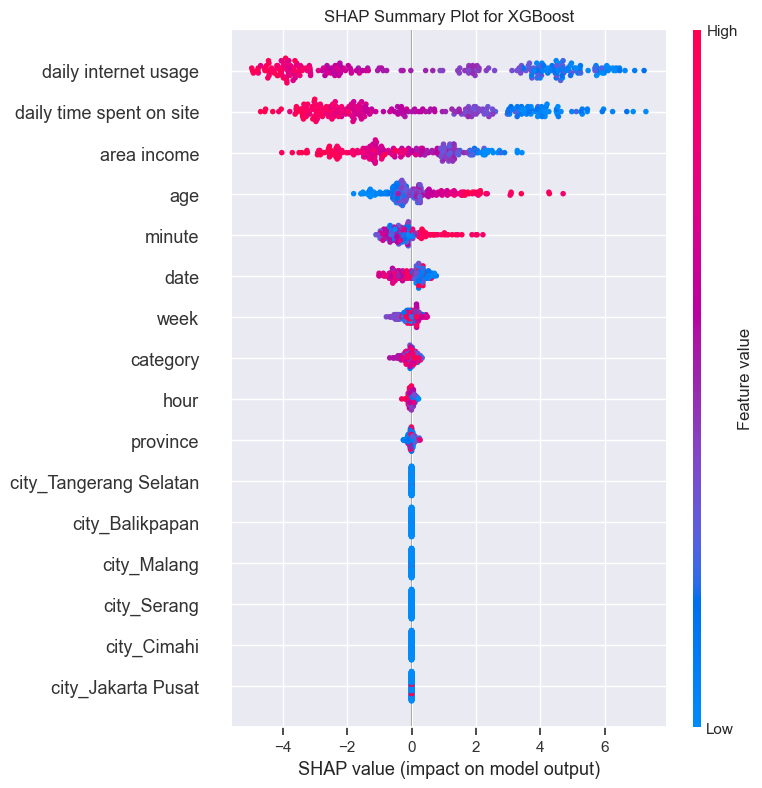

In [152]:
import shap

# Create a decision tree model with the optimal max_depth value
optimal_max_depth = 8  # You can change this based on your analysis

model = xgb
model.fit(X_train, y_train)

# Create an explainer object for the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, show=False)
plt.title("SHAP Summary Plot for XGBoost")
plt.show()

In [153]:
df['daily internet usage'].describe().to_frame().round(2)

daily internet usage
count               1,000.0
mean                 179.89
std                   43.63
min                  104.78
25%                  139.02
50%                  182.65
75%                  218.29
max                  267.01

<Axes: xlabel='daily internet usage', ylabel='Density'>

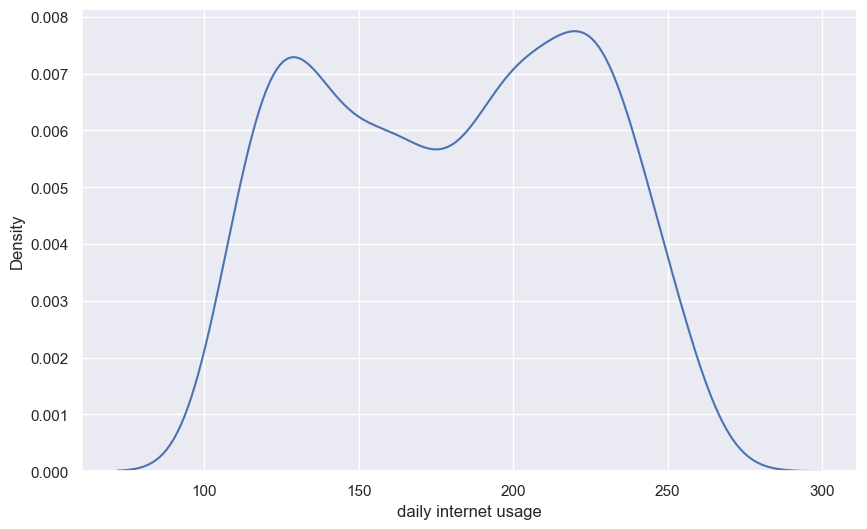

In [154]:
sns.kdeplot(data=df, x='daily internet usage')

## Simulasi Sebelum Menggunakan Machine Learning

In [157]:
df['clicked on ad'].value_counts()

0    500
1    500
Name: clicked on ad, dtype: int64

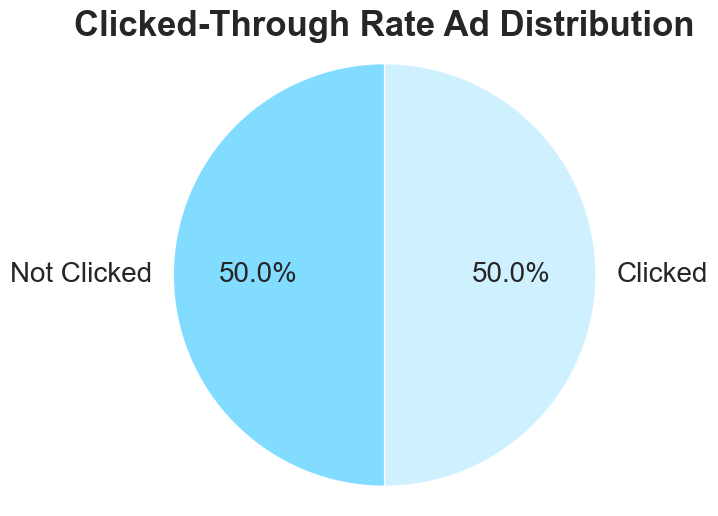

In [173]:
import matplotlib.pyplot as plt

# Hitung distribusi nilai dalam kolom 'clicked on ad'
value_counts = df['clicked on ad'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
# Menambahkan 'textprops' untuk mengatur ukuran font
plt.pie(value_counts, labels=['Not Clicked', 'Clicked'], autopct='%1.1f%%', startangle=90, colors=['#81dcff', '#cff1ff'],
        textprops={'fontsize': 20})  # Atur ukuran font sesuai keinginan
plt.title('Clicked-Through Rate Ad Distribution', weight='bold', size=25)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Tampilkan pie plot
plt.show();

In [184]:
df['daily time spent on site'].mean().round(2)
df['daily internet usage'].mean().round(2)
df['area income'].mean().round(2)

64.97

179.89

385049318.08

In [175]:
df[df['daily internet usage'] < 179.89].head()
df[df['daily internet usage'] < 179.89].shape[0]

daily time spent on site  age   area income  daily internet usage  male  \
7                       66.0   48 172,153,310.0                131.76     1   
10                     47.64   49 319,427,570.0                122.02     0   
12                     69.57   48 361,458,440.0                113.12     1   
14                     42.95   33 216,832,000.0                143.56     0   
15                     63.45   23 365,275,610.0                140.64     1   

             timestamp  clicked on ad            city       province category  \
7  2016-03-07 01:40:00              1  Bandar Lampung        Lampung   Health   
10 2016-03-16 20:19:00              1           Depok     Jawa Barat     Food   
12 2016-06-03 01:14:00              1          Serang         Banten   Travel   
14 2016-03-24 09:31:00              1          Padang  Sumatra Barat     Food   
15 2016-03-09 03:41:00              1          Padang  Sumatra Barat    House   

    date  month months  year  hour  minute  week  
7      7      3  March  2016     1      40    10  
10    16      3  March  2016    20      19    11  
12     3      6   June  2016     1      14    22  
14    24      3  March  2016     9      31    12  
15     9      3  March  2016     3      41    10

484

In [219]:
diu3 = df[(df['daily internet usage'] < 179.89) & (df['daily time spent on site'] < 64.97) & (df['area income'] <= 385049318.08)]
d31 = diu3[diu3['clicked on ad'] == 1].shape[0]
d30 = diu3[diu3['clicked on ad'] == 0].shape[0]
r3 = round((d31 / (d30 + d31)) * 100,2)

In [220]:
diu2 = df[(df['daily internet usage'] < 179.89) & (df['daily time spent on site'] < 64.97)]
d21 = diu2[diu2['clicked on ad'] == 1].shape[0]
d20 = diu2[diu2['clicked on ad'] == 0].shape[0]
r2 = round((d21 / (d20 + d21)) * 100,2)

In [221]:
diu1 = df[(df['daily internet usage'] < 179.89)]

d11 = diu1[diu1['clicked on ad'] == 1].shape[0]
d10 = diu1[diu1['clicked on ad'] == 0].shape[0]
r1 = round((d11 / (d10 + d11)) * 100,2)

In [222]:
impression = df.shape[0]

In [231]:
print(f'Total Impression =',impression)
print(f'Jika Iklan hanya melihat Daily Internet Usage, maka CTR :', r1,'%.','Jumlah klik:',d11,', jumlah ignore:',d10)
print(f'Jika Iklan hanya melihat Daily Internet Usage & daily time spent, maka CTR :', r2,'%.','Jumlah klik:',d21,', jumlah ignore:',d20)
print(f'Jika Iklan hanya melihat Daily Internet Usage & daily time spent & area income, maka CTR :', r3,'%.','Jumlah klik:',d31,', jumlah ignore:',d30)

Total Impression = 1000
Jika Iklan hanya melihat Daily Internet Usage, maka CTR : 90.91 %. Jumlah klik: 440 , jumlah ignore: 44
Jika Iklan hanya melihat Daily Internet Usage & daily time spent, maka CTR : 99.15 %. Jumlah klik: 352 , jumlah ignore: 3
Jika Iklan hanya melihat Daily Internet Usage & daily time spent & area income, maka CTR : 100.0 %. Jumlah klik: 229 , jumlah ignore: 0


In [239]:
df.head()

daily time spent on site  age   area income  daily internet usage  male  \
0                     68.95   35 432,837,300.0                256.09     0   
1                     80.23   31 479,092,950.0                193.77     1   
2                     69.47   26 418,501,580.0                 236.5     0   
3                     74.15   29 383,643,260.0                245.89     1   
4                     68.37   35 517,229,930.0                225.58     0   

            timestamp  clicked on ad           city  \
0 2016-03-27 00:53:00              0  Jakarta Timur   
1 2016-04-04 01:39:00              0       Denpasar   
2 2016-03-13 20:35:00              0       Surabaya   
3 2016-01-10 02:31:00              0          Batam   
4 2016-06-03 03:36:00              0          Medan   

                        province    category  date  month   months  year  \
0  Daerah Khusus Ibukota Jakarta   Furniture    27      3    March  2016   
1                           Bali        Food     4      4    April  2016   
2                     Jawa Timur  Electronic    13      3    March  2016   
3                 Kepulauan Riau       House    10      1  January  2016   
4                  Sumatra Utara     Finance     3      6     June  2016   

   hour  minute  week  
0     0      53    12  
1     1      39    14  
2    20      35    10  
3     2      31     1  
4     3      36    22

## Proporsi Category Pada Clicked on Ad

### Potensi Conversion Rate Before ML

In [306]:
catgr = df[df['clicked on ad'] == 1].groupby(df['category'])['age'].count().reset_index()
catgr.rename(columns={'age':'count'}, inplace=True)
catgr['impression'] = catgr['count'].sum()
catgr['ratio%'] = 100 * (catgr['count'] / catgr['impression']).round(2)
catgr = catgr.sort_values(by='ratio%', ascending=False).reset_index(drop=True)
catgr

category  count  impression  ratio%
0    Otomotif     59         500    12.0
1     Fashion     56         500    11.0
2       House     57         500    11.0
3  Electronic     48         500    10.0
4     Finance     52         500    10.0
5        Food     49         500    10.0
6      Health     48         500    10.0
7   Furniture     45         500     9.0
8      Travel     47         500     9.0
9        Bank     39         500     8.0

In [307]:
catgr['conversion rate 2.5%'] = round(catgr['count'] * 2.5/100,2)
catgr['revenue'] = round(catgr['conversion rate 2.5%'] * 1000000,2)
catgr

total_revenue = catgr['revenue'].sum()
formatted_total_revenue = '{:,}'.format(total_revenue)

total_cost = 100000  # Replace this with your actual total cost
formatted_total_cost = '{:,}'.format(total_cost)

total_profit = total_revenue - total_cost
formatted_total_profit = '{:,}'.format(total_profit)

print("Total Revenue:", formatted_total_revenue)
print("Total Cost:", formatted_total_cost)
print("Total Profit:", formatted_total_profit)


category  count  impression  ratio%  conversion rate 2.5%     revenue
0    Otomotif     59         500    12.0                  1.48 1,480,000.0
1     Fashion     56         500    11.0                   1.4 1,400,000.0
2       House     57         500    11.0                  1.42 1,420,000.0
3  Electronic     48         500    10.0                   1.2 1,200,000.0
4     Finance     52         500    10.0                   1.3 1,300,000.0
5        Food     49         500    10.0                  1.23 1,230,000.0
6      Health     48         500    10.0                   1.2 1,200,000.0
7   Furniture     45         500     9.0                  1.12 1,120,000.0
8      Travel     47         500     9.0                  1.18 1,180,000.0
9        Bank     39         500     8.0                  0.98   980,000.0

Total Revenue: 12,510,000.0
Total Cost: 100,000
Total Profit: 12,410,000.0


### Potensi Conversion Rate After ML

In [313]:
mlgr = catgr[['category','ratio%']] # narik rasio ke dframe baru
mlgr['impression'] = 944
mlgr['count'] = round(mlgr['impression'] * (mlgr['ratio%'])/100,2)
mlgr['conversion rate 2.5%'] = round(mlgr['count'] * 2.5/100,2)
mlgr['revenue'] = round(mlgr['conversion rate 2.5%'] * 1000000,2)

In [316]:
mlgr = mlgr[['category','count','impression','ratio%','conversion rate 2.5%','revenue']]
mlgr

total_revenue_1 = mlgr['revenue'].sum()
formatted_total_revenue_1 = '{:,}'.format(total_revenue_1)

total_cost_1 = 100000  # Replace this with your actual total cost
formatted_total_cost_1 = '{:,}'.format(total_cost_1)

total_profit_1 = total_revenue_1 - total_cost_1
formatted_total_profit_1 = '{:,}'.format(total_profit_1)

print("Total Revenue:", formatted_total_revenue_1)
print("Total Cost:", formatted_total_cost_1)
print("Total Profit:", formatted_total_profit_1)


category  count  impression  ratio%  conversion rate 2.5%     revenue
0    Otomotif 113.28         944    12.0                  2.83 2,830,000.0
1     Fashion 103.84         944    11.0                   2.6 2,600,000.0
2       House 103.84         944    11.0                   2.6 2,600,000.0
3  Electronic   94.4         944    10.0                  2.36 2,360,000.0
4     Finance   94.4         944    10.0                  2.36 2,360,000.0
5        Food   94.4         944    10.0                  2.36 2,360,000.0
6      Health   94.4         944    10.0                  2.36 2,360,000.0
7   Furniture  84.96         944     9.0                  2.12 2,120,000.0
8      Travel  84.96         944     9.0                  2.12 2,120,000.0
9        Bank  75.52         944     8.0                  1.89 1,890,000.0

Total Revenue: 23,600,000.0
Total Cost: 100,000
Total Profit: 23,500,000.0
